# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**
1. Определить рыночную стоимость объектов недвижимости.
2. Установить, какие факторы влияют на ценообразование стоимости квартир.

**Ход исследования:**

Данные о недвижимости я получу из файла `'/datasets/real_estate_data.csv'`. О качестве данных ничего не известно, поэтому, перед тем, как приступать к целям исследования, необходимо просмотреть и оценить данные.

*План:*
- проверить данные на ошибки и их влияние на исследование
- исправить (по возможности) все найденные ошибки (только если это не приведет к искажению результата)
- ввести и посчитать необходимые статистические данные
- провести исследовательский анализ данных
- сформулировать общий вывод исследования

### Откройте файл с данными и изучите общую информацию. 

Всего у нас *22* признака:
- количество фотографий
- послеедняя указанная цена
- общая площадь
- дата публикации
- количество комнат
- высота
- количество этажей
- жилая площадь
- этаж
- апартаменты или нет
- студия или нет
- открытая планировка или нет
- площадь кухни
- наличие балкона
- местоположение
- км до аэропорта
- км до центра города
- есть ли парки в радиусе 3 км
- км до близлежащих парков
- есть ли водоемы в радиусе 3 км
- км до близлежащих водоемов
- сколько дней висит объявление

In [43]:
import pandas as pd
import os
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import warnings #импортируем библиотеку
warnings.filterwarnings('ignore') # отключаем предупреждения
import seaborn as sns

In [6]:
pth1 = '/datasets/real_estate_data.csv'
pth2 = 'C:/Users/Home/Documents/Яндекс/need.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pt1, sep='\t')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')

In [34]:
# сбор данных о датафрейме:
def data_info(data):
    print(f'''
    ----------------------------------------
    Первые строки датафрейма:
    ----------------------------------------''')
    display(data.head())
    print(f'''
    ----------------------------------------
    Последние строки датафрейма:
    ----------------------------------------''')
    display(data.tail())
    print(f'''
    ----------------------------------------
    Общая информация:
    ----------------------------------------''')
    print(data.info())
    print(f'''
    ----------------------------------------
    Дупликаты:
    ----------------------------------------''')
    print(data.duplicated().sum())
    print(f'''
    ----------------------------------------
    Пропуски в процентах:
    ----------------------------------------''')
    display(round(data.isna().mean()*100,))
    print(f'''
    ----------------------------------------
    И немного статистических данных:
    ----------------------------------------''')
    print(data.describe(include='all'))

In [35]:
data_info(data)


    ----------------------------------------
    Первые строки датафрейма:
    ----------------------------------------


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0



    ----------------------------------------
    Последние строки датафрейма:
    ----------------------------------------


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN



    ----------------------------------------
    Общая информация:
    ----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony 

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          39.0
floors_total             0.0
living_area              8.0
floor                    0.0
is_apartment            88.0
studio                   0.0
open_plan                0.0
kitchen_area            10.0
balcony                 49.0
locality_name            0.0
airports_nearest        23.0
cityCenters_nearest     23.0
parks_around3000        23.0
parks_nearest           66.0
ponds_around3000        23.0
ponds_nearest           62.0
days_exposition         13.0
dtype: float64


    ----------------------------------------
    И немного статистических данных:
    ----------------------------------------
        total_images    last_price    total_area first_day_exposition  \
count   23699.000000  2.369900e+04  23699.000000                23699   
unique           NaN           NaN           NaN                 1491   
top              NaN           NaN           NaN  2018-02-01T00:00:00   
freq             NaN           NaN           NaN                  368   
mean        9.858475  6.541549e+06     60.348651                  NaN   
std         5.682529  1.088701e+07     35.654083                  NaN   
min         0.000000  1.219000e+04     12.000000                  NaN   
25%         6.000000  3.400000e+06     40.000000                  NaN   
50%         9.000000  4.650000e+06     52.000000                  NaN   
75%        14.000000  6.800000e+06     69.900000                  NaN   
max        50.000000  7.630000e+08    900.000000                  NaN

Итак, небольшой вывод по первичному осмотру данных:

- всего у нас 23700 объектов - следовательно, использовать можем вообще все из них - ген. совокупность не такая большая, чтобы делить на выборки

- везде много пропусков - где то они означают "0", а где то - нехватку данных. Осталось понять где что. Возможно, там, где в столбцах булев тип данных - NaN = '0', а там где числовой - можно будет сгруппировать по тем данным, что у нас есть без пропусков, скажем, выделить характеристики объектов, и заполнить средними показателями по группе.

*(Также, если смотреть логически, некоторые в некоторых колонках NaN все таки тоже может обозначать 0, тк, например, в доме может не быть балконов или объект может находиться в центре города => city_centers_nearest = 0)*

- пропуски в колонках про парки и пруды заполнить будет достаточно сложно, нужно будет обращаться к Яндекс.Картам, так что их думаю можно оставить как есть.

Посмотрим все на графиках:

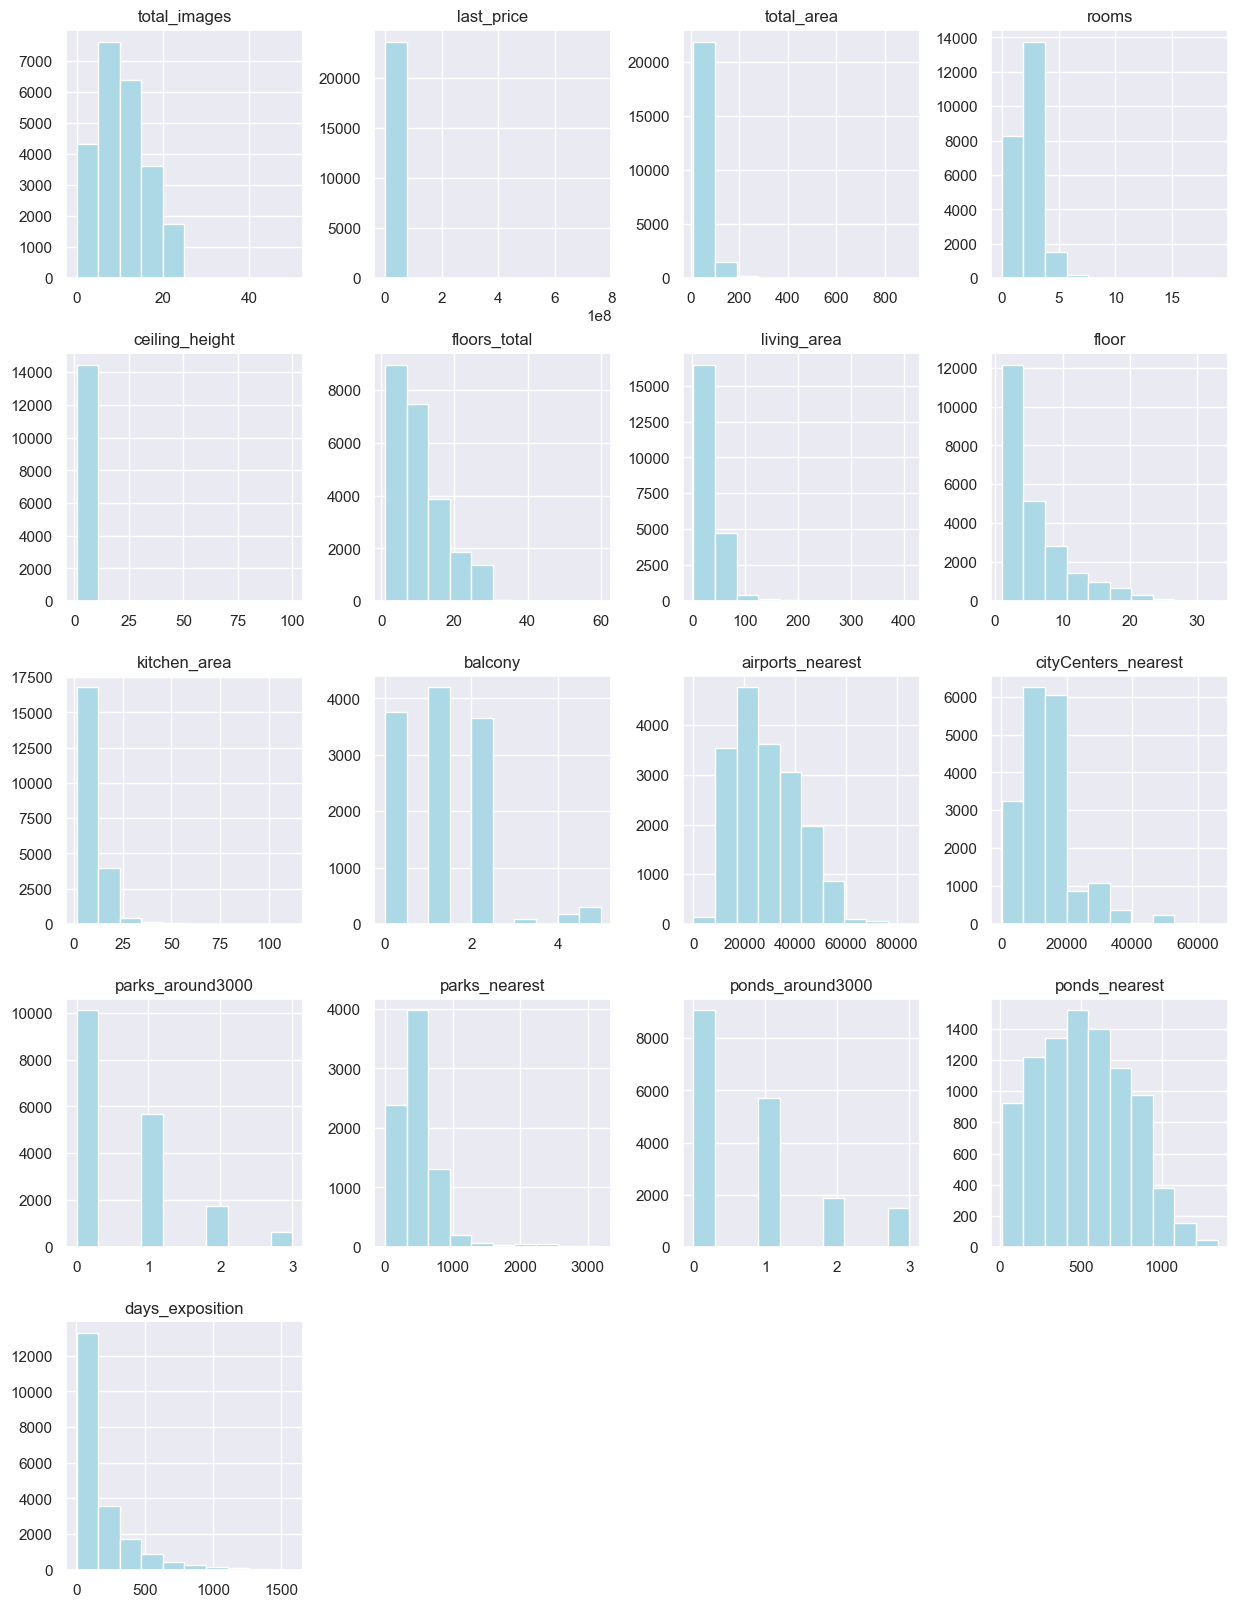

In [68]:
sns.set()
data.hist(figsize=(15,20), color='lightblue')
plt.show()

Судя по графикам (по порядку):

1. Кажется странным 30 + фото, надо бы проверить, нет ли ошибки

2. В колонке last price не понятны значения около единицы по "Х"

3. Скорее всего есть взаимосвязь, между площадью квартиры, площадью кухни и количеством комнат - нужно проверить

4. Возможно вместе с ними и количество балконов, жилая площадь

5. К высоте потолков тоже вопросы - есть явный выброс непонятного характера, надо посмотреть что там.

6. Некоторые квартиры имеют жилую площадь, близкую к нулю - в наших реалиях выглядит странно, надо бы посмотреть с чем это может быть связано.

7. Некоторые колонки я бы переименовала, т.к. сочетания CamelCase и snake_case - тяжело воспринимаются. Конкретно - cityCenters_nearest, parks/pond_around3000

8. Ну и прежде всего хочется сделать сортировку по городам, потому как сравнивать объекты из разных городов - не самая лучшая как по мне идея.

9. Так же, я бы привела к другому типу данных несколько колонок - например - в колонке с датой можно убрать время вообще (так как нас интересует только сама дата и привести ее к виду to_datetime()

### Предобработка данных

Для начала, для удобства, я переименую некоторые столбцы (сделаем *snake_case*):

In [69]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                            'parks_around3000':'parks_around_3000',
                            'ponds_around3000':'ponds_around_3000',
                            'studio':'is_studio'})
#data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [70]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Также, у нас есть единственный столбец с текстовой информацией - название населённого пункта, проверим там на неявные дупликаты:

In [71]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Как и ожидалось, нужно заменить буквы и слова, а также привести к нижнему регистру:

In [74]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=False)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок', regex=False)
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок', regex=False)
data['locality_name'] = data['locality_name'].str.lower()

In [75]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

323


array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

Также, можно заменить пропущенные значения в living area и kitchen area исходя из средних по группировке по комнатам и общем метраже - скорее всего, при примерно одинаковых показателях того и другого, будет примерно одинаковое соотношение жилой площади и кухонной. Для начала, обозначим границы групп:

In [76]:
pd.qcut(data['total_area'],4)

0         (69.9, 900.0]
1          (40.0, 52.0]
2          (52.0, 69.9]
3         (69.9, 900.0]
4         (69.9, 900.0]
              ...      
23694     (69.9, 900.0]
23695      (52.0, 69.9]
23696      (52.0, 69.9]
23697     (69.9, 900.0]
23698    (11.999, 40.0]
Name: total_area, Length: 23699, dtype: category
Categories (4, interval[float64, right]): [(11.999, 40.0] < (40.0, 52.0] < (52.0, 69.9] < (69.9, 900.0]]

А теперь для удобства введем локальную функцию:

In [77]:
def area_category(t):
    if 11 < t < 40:
        return 'small'
    elif 40 < t < 52:
        return 'medium'
    elif 52 < t < 69.9:
        return 'big'
    else:
        return 'too_big'

In [78]:
data['area_category'] = data['total_area'].apply(area_category)

In [79]:
df1 = data.pivot_table(index='area_category', aggfunc='median', margins=True)\
[['rooms','total_area','kitchen_area','living_area']].copy()
df1['liv_per'] = (df1['living_area']/df1['total_area'])*100
df1['kit_per'] = (df1['kitchen_area']/df1['total_area'])*100
df1

,rooms,total_area,kitchen_area,living_area,liv_per,kit_per
area_category,,,,,,
big,2,60.0,9.000,35.5,59.166667,15.000000
medium,2,45.0,8.000,27.3,60.666667,17.777778
small,1,34.0,8.100,17.1,50.294118,23.823529
too_big,3,84.4,12.415,50.0,59.241706,14.709716
All,2,60.0,10.000,35.0,58.333333,16.666667


Разделив объекты по площади видно, что в среднем жилая площадь составляет 60% от всей, и около 17% на кухню - следовательно, думаю можно заполнить пропуски этими значениями

In [80]:
df2 = data[(data['living_area'].isna())|(data['kitchen_area'].isna())][['total_area','living_area','kitchen_area']].copy()
df2['living_area'] = df2['living_area'].fillna(0.6*df2['total_area'])
df2['kitchen_area'] = df2['kitchen_area'].fillna(0.17*df2['total_area'])
df2

,total_area,living_area,kitchen_area
3,159.00,95.40,27.030
7,71.60,42.96,18.900
30,32.80,19.68,5.576
37,45.80,27.48,7.786
44,40.00,24.00,6.800
...,...,...,...
23663,88.00,52.80,14.960
23670,45.60,27.36,7.752
23679,35.00,21.00,5.950
23696,56.70,29.70,9.639


In [81]:
data['living_area'] = data['living_area'].fillna(df2['living_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(df2['kitchen_area'])
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.000,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,too_big
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.000,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,medium
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.300,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,big
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,95.40,9,NaN,False,False,27.030,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,too_big
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.000,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,too_big
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,NaN,False,False,13.830,NaN,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,too_big
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,False,False,8.500,NaN,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,big
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,False,False,9.639,NaN,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,big
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,46.05,12,NaN,False,False,23.300,2.0,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,too_big


Таким образом мы избавились от пропусков в жилой площади:

In [82]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
is_studio                   0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
area_category               0
dtype: int64

Возможно, есть какие либо закономерности у объектов с одинаковым количеством комнат. Также заметила, что у одних и тех же местоположений - одни и те же пропуски в airports и city centers. Есть вариант - заменить пропуски медианным значением по городу. Единственный нюанс - если по городу **вообще** не будет никаких данных - то получается, заполнять нужно нулём

In [113]:
for t in data['locality_name'].unique():
    data.loc[((data['locality_name']==t)&(data['airports_nearest'].isna())),'airports_nearest'] =\
    data.loc[(data['locality_name']==t),'airports_nearest'].median()
    
# для всех остальных - заполним нулем все что не заполнилось в предыдущем пункте
data.loc[(data['airports_nearest'].isna()), 'airports_nearest'] = 0

Ну и также приведем дату к божескому виду - время здесь везде 00:00, поэтому его можно отбросить:

In [114]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,too_big
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,medium
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.300,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,big
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,too_big
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.100,0,поселок янино-1,0.0,NaN,NaN,NaN,NaN,NaN,55.0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.00,8,False,False,False,8.000,0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,big
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.00,4,False,False,False,8.500,0,тосно,0.0,NaN,NaN,NaN,NaN,NaN,45.0,big
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.70,1,False,False,False,9.639,0,село рождествено,0.0,NaN,NaN,NaN,NaN,NaN,NaN,big
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,46.05,12,False,False,False,23.300,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,too_big


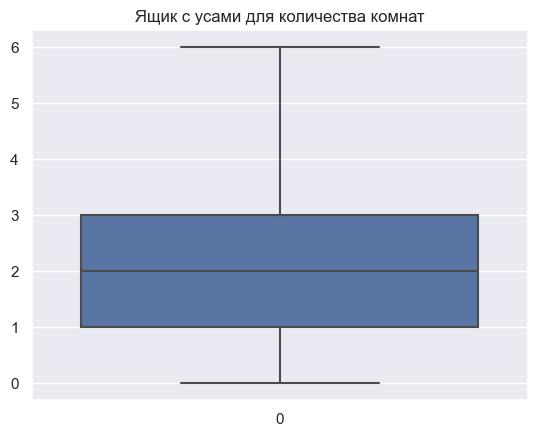

In [241]:
plt.title('Ящик с усами для количества комнат')
sns.boxplot(data['rooms']);

In [96]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Объекты, где комнат > 6 - достаточно редкие явления, также как и живая площадь > 120 кв.м. и площадь кухни, так что я думаю, такие объекты можно исключить из выборки:

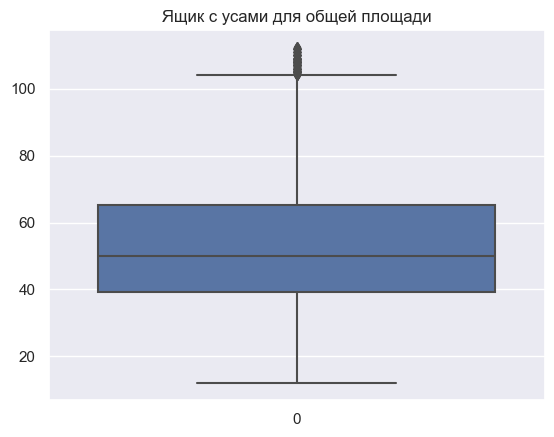

In [242]:
plt.title('Ящик с усами для общей площади')
sns.boxplot(data['total_area']);

In [25]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Методом нехитрой математики, определив межквартильный диапазон и высчитав размер верхнего "уса" - посчитали, что граница значений находится на 112.5. Выше - выбросы по значениям, следовательно, все объекты, с площадью больше 112.5 квадратных метров - можно исключить из выборки

In [115]:
data = data.query('total_area <=112.5 & rooms <= 6')

Также, скорее всего, если в графе `балкон` стоит `NaN` - то вероятнее всего, что его просто нет => заполним нулями все пропуски (и заодно приведем к типу `int`, потому что не может быть полтора балкона - это что-то из *страны невыученных уроков*)

`is_apartment` - булев тип данных, и если не указано явно, что это апартаменты, то скорее всего - это ***не*** апартаменты

Ну и так как пропусков в `floors_total` < 5%, то чтобы сэкономить время, уберем строки с пропусками.

Строки с пропусками в `locality_name`  могут помешать в дальннейшем анализе, поэтому их тоже уберем:

In [102]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data = data[data['floors_total'].notna()]
data = data.astype({'balcony': int, 'floors_total': int, 'is_apartment':bool})
data = data[data['locality_name'].notna()]

Далее - `высота`:

In [106]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   2.61,   3.2 ,
         3.25,   3.45,   2.77,   2.64,   2.57,   4.15,   4.  ,   2.47,
         2.73,   2.84,   3.1 ,   2.34,   3.4 ,   3.06,   2.72,   2.54,
         2.51,   2.78,   2.76,  25.  ,   2.58,   3.7 ,   2.52,   3.5 ,
         2.87,   2.66,   2.59,   2.  ,   2.85,   3.3 ,   2.45,   2.92,
         3.13,   3.8 ,   3.15,   3.55,   3.62,   3.12,   2.53,   2.96,
         2.46,   2.74,   5.  ,   2.79,   2.95,   4.06,   2.94,   3.54,
         3.53,   2.83,   2.4 ,   3.38,   3.01,   3.65,   2.71,   3.35,
         2.3 ,   2.48,   2.62,   3.57,   2.82,   3.98,   2.63,   3.83,
         3.75,   2.88,   3.66,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
        32.  ,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.16,   3.6 ,
         3.34,   2.81,   3.44,   2.97,   4.37,   2.68,   3.9 ,   3.27,
        27.  ,   4.1 ,   3.95,   3.46,  24.  ,   3.47,   3.33,   3.63,
      

In [107]:
data[data['ceiling_height']>10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,9.384,2,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,big
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.000,0,волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,too_big
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.000,1,санкт-петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,medium
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,4.250,2,поселок мурино,51553.0,NaN,NaN,NaN,NaN,NaN,28.0,small
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.500,0,санкт-петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,small
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.000,2,деревня мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,big
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,False,False,7.000,2,санкт-петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0,medium
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,False,12.000,5,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,too_big
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,False,False,5.700,0,кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN,medium
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,False,False,5.200,0,санкт-петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN,medium


Скорее всего, там где указано `>10` - очепятка, исправим это лямбда-функцией:

In [109]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x > 10 else x)

In [110]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  2.61,  3.2 ,  3.25,  3.45,
        2.77,  2.64,  2.57,  4.15,  4.  ,  2.47,  2.73,  2.84,  3.1 ,
        2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,  2.78,  2.76,  2.58,
        3.7 ,  2.52,  3.5 ,  2.87,  2.66,  2.59,  2.  ,  2.85,  3.3 ,
        2.45,  2.92,  3.13,  3.8 ,  3.15,  3.55,  3.62,  3.12,  2.53,
        2.96,  2.46,  2.74,  5.  ,  2.79,  2.95,  4.06,  2.94,  3.54,
        3.53,  2.83,  2.4 ,  3.38,  3.01,  3.65,  2.71,  3.35,  2.3 ,
        2.48,  2.62,  3.57,  2.82,  3.98,  2.63,  3.83,  3.75,  2.88,
        3.66,  4.19,  3.24,  4.8 ,  4.5 ,  4.2 ,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.16,  3.6 ,  3.34,  2.81,  3.44,  2.97,  4.37,
        2.68,  3.9 ,  3.27,  4.1 ,  3.95,  3.46,  3.47,  3.33,  3.63,
        3.14,  3.32,  3.52,  1.2 ,  3.18,  8.3 ,  2.93,  2.98,  3.36,
        2.86,  3.08,  3.17,  3.11,  3.67,  3.28,  3.04,  3.26,  3.84,
        3.23,  3.02,

Пропуски в высоте потолков заполнить не получится, т.к. у разных зданий и разных комнат будут разные потолки, необходимо понимать тип здания (допустим, Хрущевка или Сталинка и т.п.) и заполнять уже на основе этих данных. Но так как этих данных у нас нет, то пропуски в этих колонках я оставлю нетронутыми.

`Аэропорт`: скорее всего, если не указано, сколько до него км, то его вообще нет поблизости (нужно добираться через другой город или поселок, например) - поэтому тоже заполним пропуски нулями

In [111]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,too_big
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,medium
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.300,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,big
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,too_big
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.100,0,поселок янино-1,0.0,NaN,NaN,NaN,NaN,NaN,55.0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.00,8,False,False,False,8.000,0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,big
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.00,4,False,False,False,8.500,0,тосно,0.0,NaN,NaN,NaN,NaN,NaN,45.0,big
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.70,1,False,False,False,9.639,0,село рождествено,0.0,NaN,NaN,NaN,NaN,NaN,NaN,big
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,46.05,12,False,False,False,23.300,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,too_big


In [117]:
for t in data['locality_name'].unique():
    data.loc[((data['locality_name']==t)&(data['city_centers_nearest'].isna())),'city_centers_nearest'] =\
    data.loc[(data['locality_name']==t),'city_centers_nearest'].median()

    
data.loc[(data['city_centers_nearest'].isna()), 'city_centers_nearest'].fillna(0)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,too_big
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,medium
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.300,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,big
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,too_big
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.100,0,поселок янино-1,0.0,0.0,NaN,NaN,NaN,NaN,55.0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.00,8,False,False,False,8.000,0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,big
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.00,4,False,False,False,8.500,0,тосно,0.0,0.0,NaN,NaN,NaN,NaN,45.0,big
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.70,1,False,False,False,9.639,0,село рождествено,0.0,0.0,NaN,NaN,NaN,NaN,NaN,big
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,46.05,12,False,False,False,23.300,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,too_big


**Промежуточный вывод**

В изначальной таблице было много пропусков, некоторые колонки нужно было привести к нужному типу данных, а также заполнить пропуски подходящими данными (если это возможно)

После обработки данных мы заполнили пропуски по колонкам `rooms, living_area,is_apartment, kitchen_area, balcony`, а также `airports_nearest`, привели колонки `balcony, floors_total, is_apartment` и `first_day_exposition` к нужному типу данных, а также избавились от явных и неявных дупликатов.

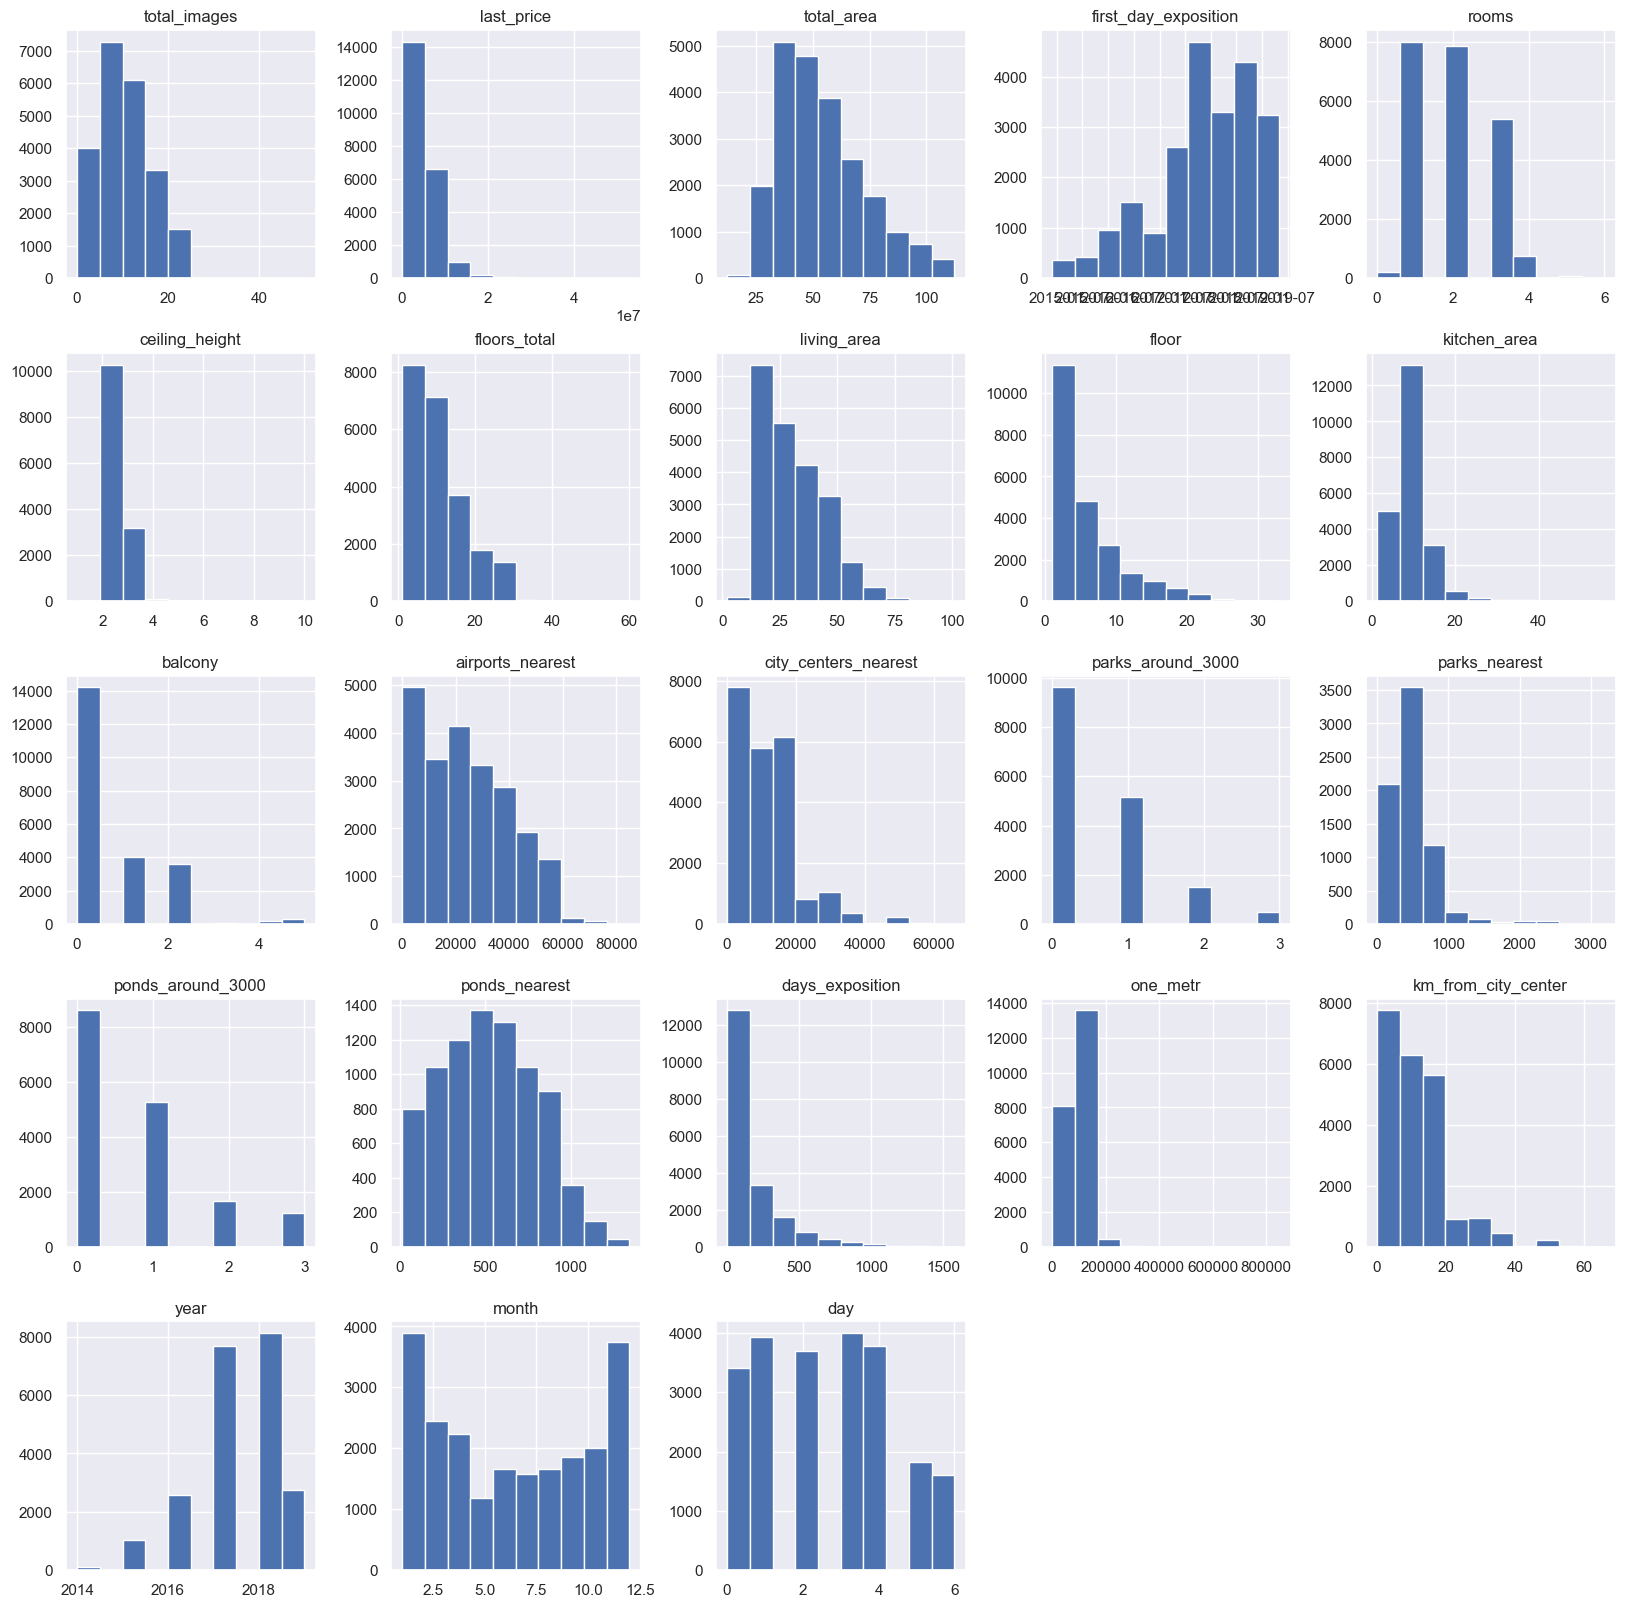

In [245]:
data.hist(figsize=(20,20));

### 2. Посчитайте и добавьте в таблицу новые столбцы

Добавим:
- день недели публикации
- месяц публикации
- цену за один квадратный метр
- год публикации
- тип этажа (первый / последний / другой)
- расстояние до центра в км

In [119]:
def floor(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

In [129]:
data['one_metr'] = (data['last_price']/data['total_area']).round()
data['km_from_city_center'] = (data['city_centers_nearest'] / 1000).round()
data['floor_type'] = data.apply(floor, axis=1)
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category,one_metr,km_from_city_center,floor_type,year,month,day
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,too_big,120370.0,16.0,Другой,2019,3,3
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,medium,82921.0,19.0,Первый,2018,12,1
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.300,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,big,92786.0,14.0,Другой,2015,8,3
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,too_big,100000.0,8.0,Другой,2018,6,1
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.100,0,поселок янино-1,0.0,0.0,NaN,NaN,NaN,NaN,55.0,small,95066.0,0.0,Другой,2018,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.00,8,False,False,False,8.000,0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,big,73718.0,34.0,Другой,2016,8,4
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.00,4,False,False,False,8.500,0,тосно,0.0,0.0,NaN,NaN,NaN,NaN,45.0,big,52542.0,0.0,Другой,2018,1,0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.70,1,False,False,False,9.639,0,село рождествено,0.0,0.0,NaN,NaN,NaN,NaN,NaN,big,44092.0,0.0,Первый,2018,2,6
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,46.05,12,False,False,False,23.300,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,too_big,149511.0,10.0,Другой,2017,3,1


In [130]:
data.groupby('day')[['last_price']].count()

,last_price
day,
0,3406
1,3941
2,3704
3,4000
4,3778
5,1826
6,1604


In [131]:
data.groupby('year')[['last_price']].count()

,last_price
year,
2014,102
2015,1032
2016,2562
2017,7699
2018,8132
2019,2732


In [132]:
data.groupby('month')[['last_price']].count()

,last_price
month,
1,1401
2,2488
3,2449
4,2240
5,1182
6,1660
7,1578
8,1652
9,1851


In [133]:
df7 = data.groupby('floor_type')[['last_price']].count().copy()
df7['perc'] = (df7['last_price']/len(data))*100
df7

,last_price,perc
floor_type,,
Другой,16381,73.592704
Первый,2820,12.669033
Последний,3058,13.738263


**Промежуточный вывод**

- Больше всего объявлений было выставлено в будние дни - конкретно - в четверг, и меньше всего в выходные

- Больше всего объявлений было в 2017 и 2018 годах. Возможно - раньше меньше пользовались данным сервисом для продажи квартир, или продавали через другие агентства/искали покупателя сами. При том, в 2019 году количество заявлений резко уменьшилось.

- Также, чаще всего объявления выкладывались в конце зимы-начале весны и конце осени-начале зимы. Возможно это связано с какими либо праздниками. При том, в мае было меньше всего новых объявлений

- Среди этажей - примерно одинаковое количество объявлений было по объектам на первом/последнем этаже - 12-13% от общего количества объектов

### Проведите исследовательский анализ данных

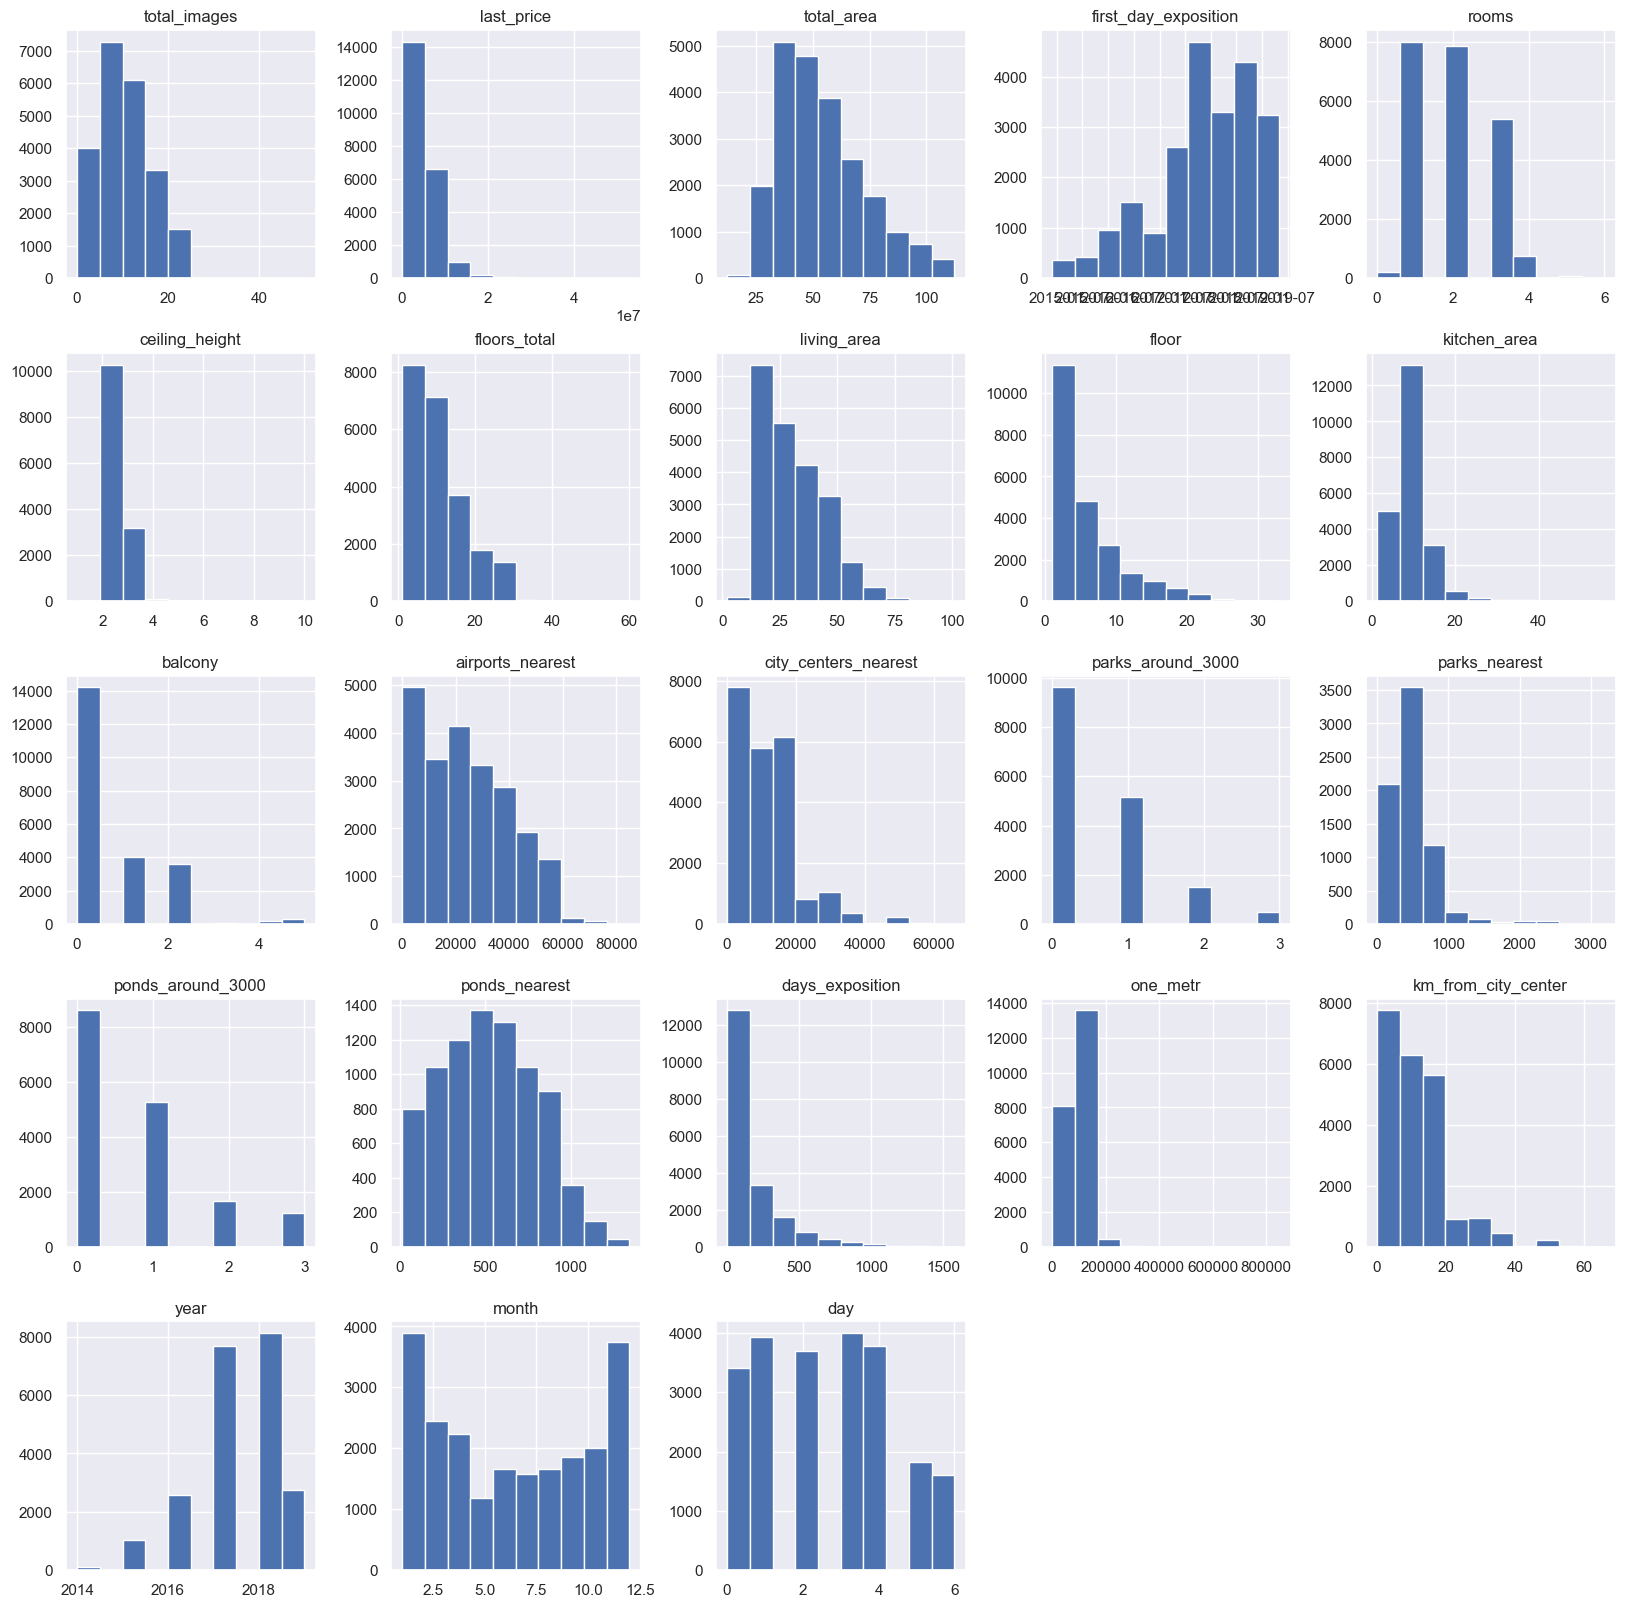

In [134]:
data.hist(figsize=(20,20));

Рассмотрим некоторые значения в чуть более маленьком интервале:

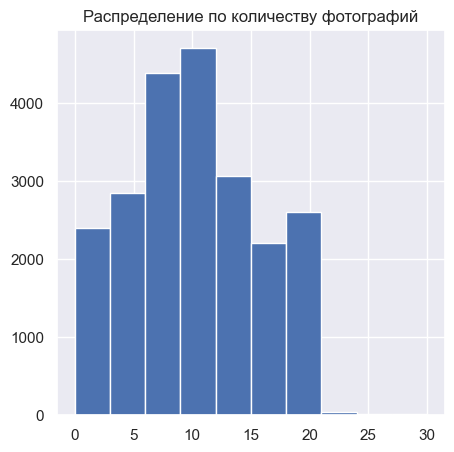

In [246]:
plt.title('Распределение по количеству фотографий')
data['total_images'].hist(range=(0,30), figsize=(5,5));

Более 9 тысяч суммарно объявлений с наличием фото от 6 до 12. Также на графике видно, что есть объекты с фотографиями в количестве > 21

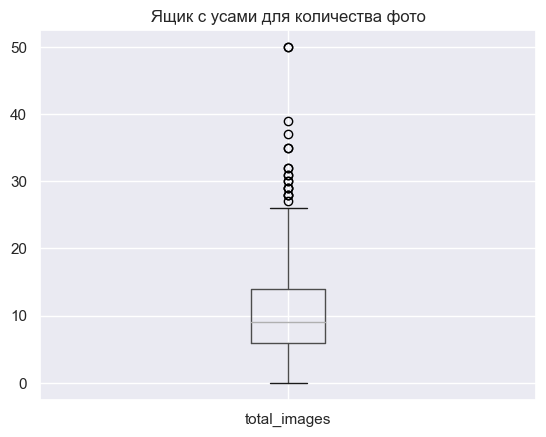

In [247]:
plt.title('Ящик с усами для количества фото')
data.boxplot(column='total_images');

Но в данном случае, такие объекты являются выбросами

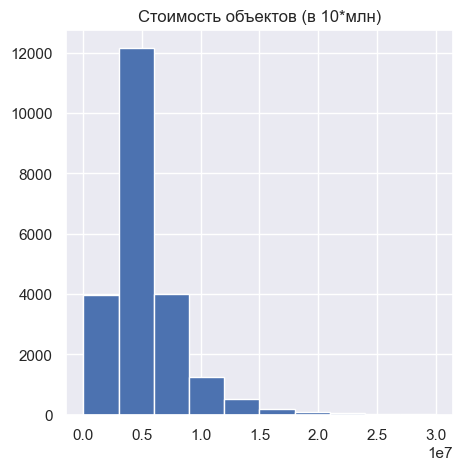

In [258]:
plt.title('Стоимость объектов (в 10*млн)')
data['last_price'].hist(range=(0, 3e+07),figsize=(5,5));

Пиковое значение - при стоимости квартир около 5 миллионов - более 12000 позиций с такой ценой

Значений в нуле нет - и это хорошо - но вот стоимость объекта до 200000 - странно, посмотрим:

In [139]:
data[data['last_price']<=50000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category,one_metr,km_from_city_center,floor_type,year,month,day
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,too_big,112.0,9.0,Последний,2019,3,2


Очень странная квартира за такую стоимость, с 100+ площадью и провисевшая на сервисе 8 дней. Не могу сказать точно, это была ошибка при вывешивании объявления и ее быстро удалили вместе с объявлением, или же это была ошибка в данных, но квартиру быстро купили, и менять ничего не пришлось.

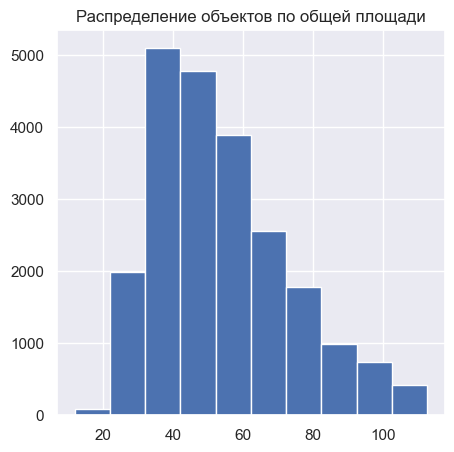

In [259]:
plt.title('Распределение объектов по общей площади')
data['total_area'].hist(figsize=(5,5));

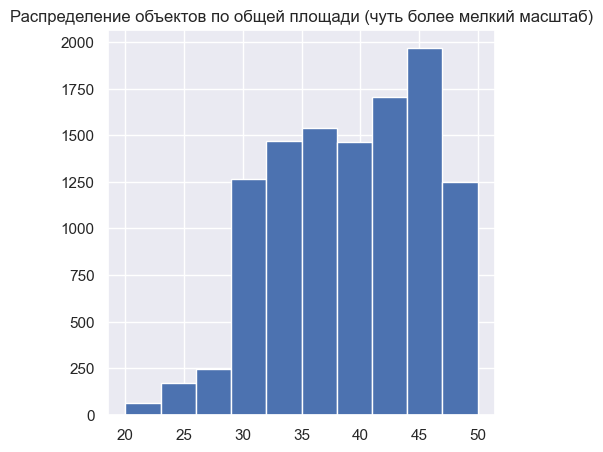

In [260]:
plt.title('Распределение объектов по общей площади (чуть более мелкий масштаб)')
data['total_area'].hist(range=(20,50),figsize=(5,5));

Пик на гистограмме наблюдается от 29 до 47 квадратных метров - больше всего квартир именно с этим метражем. В данной диаграмме уже не наблюдается выбросов как таковый, только значения < 21 смущают:

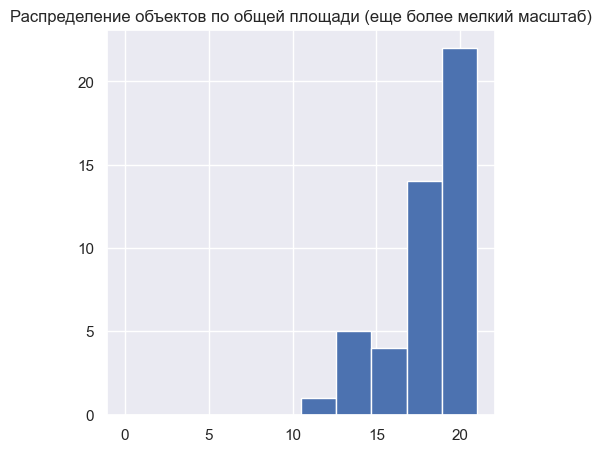

In [261]:
plt.title('Распределение объектов по общей площади (еще более мелкий масштаб)')
data['total_area'].hist(range=(0,21),figsize=(5,5));

In [143]:
data[data['total_area']<20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category,one_metr,km_from_city_center,floor_type,year,month,day
716,5,1500000.0,17.00,2017-06-07,0,2.70,9,12.00,1,False,True,False,2.8900,0,поселок шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,small,88235.0,30.0,Первый,2017,6,2
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5,9.00,2,False,False,False,3.0600,0,санкт-петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0,small,183333.0,5.0,Другой,2018,11,2
5855,3,945750.0,19.50,2017-09-18,0,2.76,3,12.70,2,False,True,False,3.3150,0,поселок дубровка,0.0,0.0,NaN,NaN,NaN,NaN,3.0,small,48500.0,0.0,Другой,2017,9,0
6084,6,770000.0,18.00,2017-10-16,1,NaN,5,13.00,4,False,False,False,3.0000,0,тихвин,0.0,0.0,NaN,NaN,NaN,NaN,90.0,small,42778.0,0.0,Другой,2017,10,0
8454,7,2250000.0,19.00,2019-03-12,0,3.00,6,11.40,2,False,True,False,3.2300,0,санкт-петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0,small,118421.0,7.0,Другой,2019,3,1
8729,9,2200000.0,18.40,2018-08-20,1,2.52,3,14.00,3,False,False,False,2.4000,0,пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0,small,119565.0,31.0,Последний,2018,8,0
8755,1,1350000.0,18.80,2017-11-22,0,2.75,19,15.80,1,False,True,False,3.1960,0,санкт-петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0,small,71809.0,14.0,Первый,2017,11,2
8886,10,2450000.0,15.50,2018-08-22,0,NaN,5,10.00,2,False,True,False,2.6350,0,санкт-петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0,small,158065.0,5.0,Другой,2018,8,2
9157,0,3400000.0,17.60,2018-03-18,1,NaN,5,15.00,2,False,False,False,2.9920,0,санкт-петербург,21555.0,1967.0,2.0,336.0,1.0,309.0,117.0,small,193182.0,2.0,Другой,2018,3,6
9412,5,2100000.0,16.00,2017-12-10,0,NaN,6,13.00,1,False,False,True,2.7200,0,санкт-петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0,small,131250.0,2.0,Первый,2017,12,6


В целом, данные по этим квартирам выглядят нормально, ничего критически отличающегося я не заметила

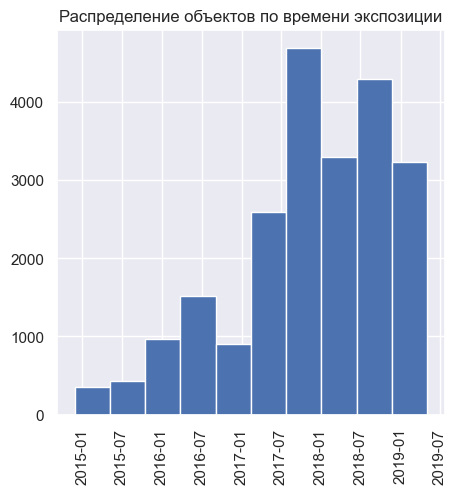

In [262]:
plt.title('Распределение объектов по времени экспозиции')
data['first_day_exposition'].hist(figsize=(5,5),xrot=90);

По гистограмме видно 2 пика - во второй половине 2017 года и во второй половине 2018 года.

Однако, что-то непонятное произошло в конце 2016 года.

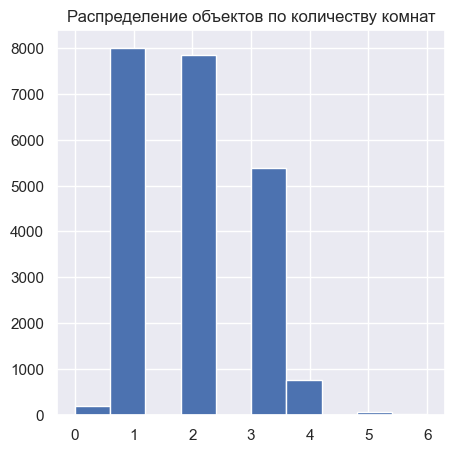

In [263]:
plt.title('Распределение объектов по количеству комнат')
data['rooms'].hist(figsize=(5,5));

Я уже замечала этот несколько объектов с 0 комнат и нормальным метражем, однако там либо стоит *open plan = True*, ничего делать не нужно, т.к. там действительно нет комнат как таковых, либо же это студия.

In [146]:
data[(data['rooms']==0)&((data['is_studio'].isna())|(data['open_plan'].isna()))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category,one_metr,km_from_city_center,floor_type,year,month,day


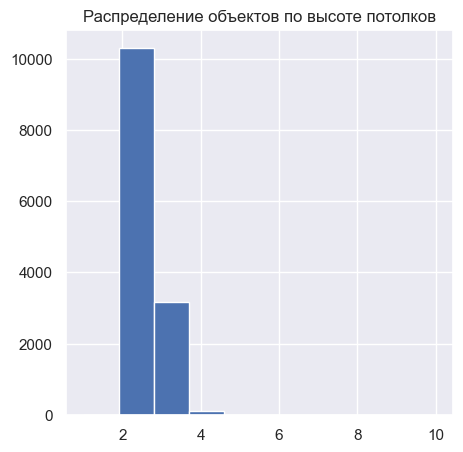

In [264]:
plt.title('Распределение объектов по высоте потолков')
data['ceiling_height'].hist(figsize=(5,5));

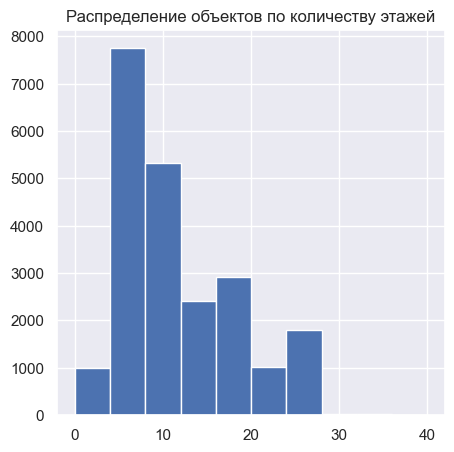

In [265]:
plt.title('Распределение объектов по количеству этажей')
data['floors_total'].hist(range=(0,40),figsize=(5,5));

На данном графике пик - на значении с 4 по 8, и даже встречаются дома с 27+ этажами, но построим более приближенный, чтобы оценить детали:

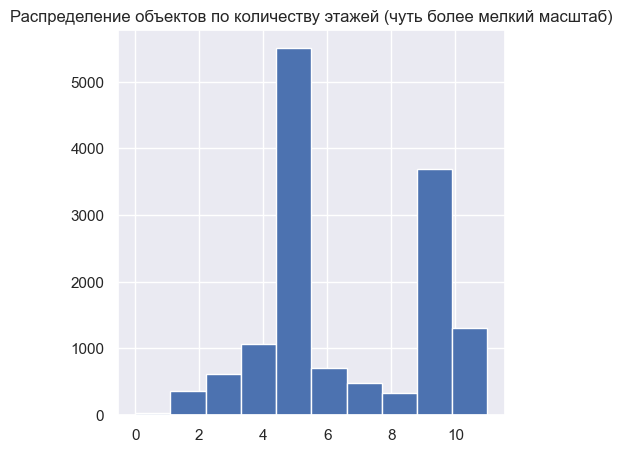

In [266]:
plt.title('Распределение объектов по количеству этажей (чуть более мелкий масштаб)')
data['floors_total'].hist(range=(0,11),figsize=(5,5));

Здесь уже видно, что пик приходит на дома с 5ю этажами и 9 этажами - самый часто-встречающийся тип жилых домов

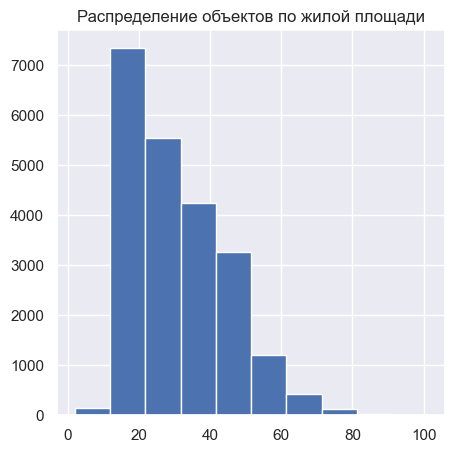

In [267]:
plt.title('Распределение объектов по жилой площади')
data['living_area'].hist(figsize=(5,5));

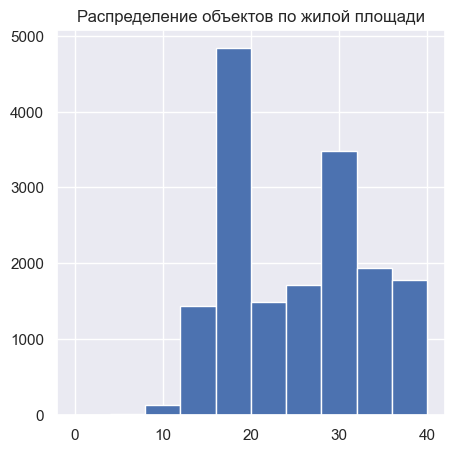

In [268]:
plt.title('Распределение объектов по жилой площади')
data['living_area'].hist(range=(0,40),figsize=(5,5));

Значений в 0 нет - прекрасно. Чаще всего встречаются квартиры с 16-20 метрами жилой площади, и чуть отстают по частоте - 28-32 $м^2$

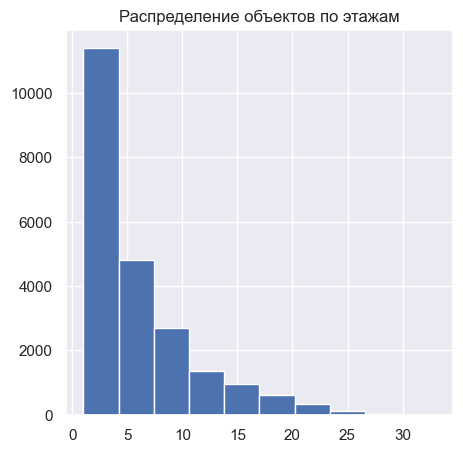

In [269]:
plt.title('Распределение объектов по этажам')
data['floor'].hist(figsize=(5,5));

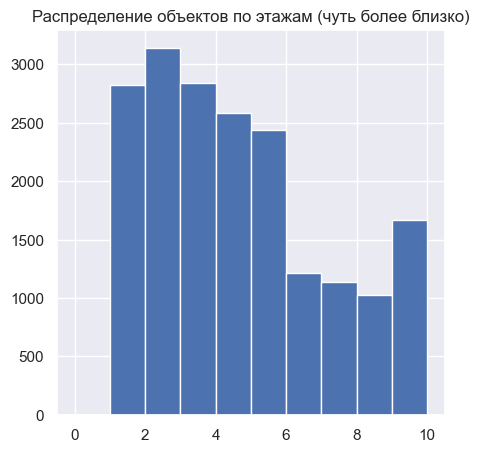

In [270]:
plt.title('Распределение объектов по этажам (чуть более близко)')
data['floor'].hist(figsize=(5,5),range=(0,10));

Однако, больше всего квартир на 2м этаже, или на 9 - и подозреваю, эти квартиры последние в своем доме

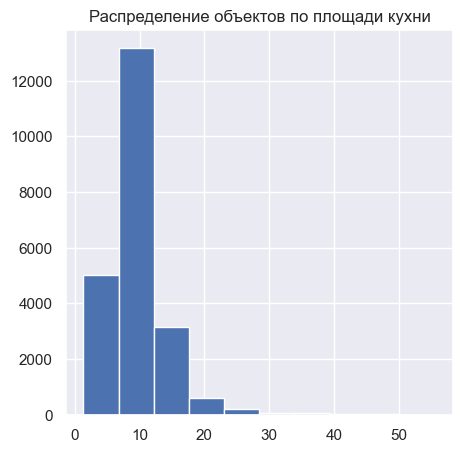

In [271]:
plt.title('Распределение объектов по площади кухни')
data['kitchen_area'].hist(figsize=(5,5));

Средним квартирами - средний размер кухни

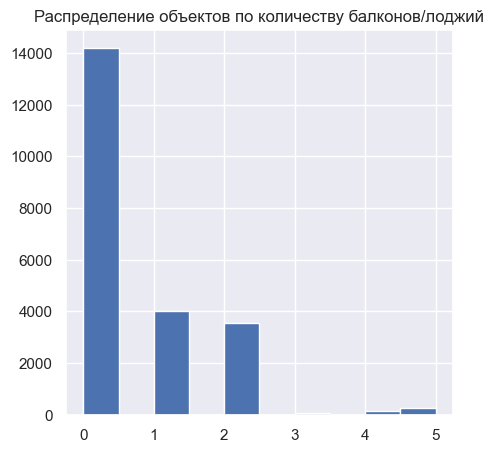

In [272]:
plt.title('Распределение объектов по количеству балконов/лоджий')
data['balcony'].hist(figsize=(5,5));

Либо в квартире нет балкона вообще, либо 1 или 2 - больше встречается редко

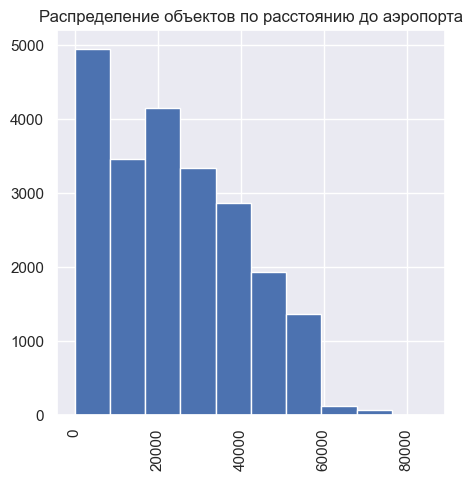

In [273]:
plt.title('Распределение объектов по расстоянию до аэропорта')
data['airports_nearest'].hist(figsize=(5,5),xrot=90);

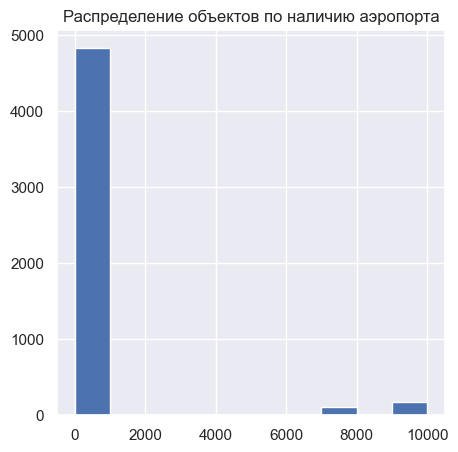

In [275]:
plt.title('Распределение объектов по наличию аэропорта')
data['airports_nearest'].hist(figsize=(5,5),range=(0,10000));

Либо аэропортов нет вообще - там где пропуски мы заполняли нулями (аэропорт не может быть в центре села), либо до аэропорта примерно 20км

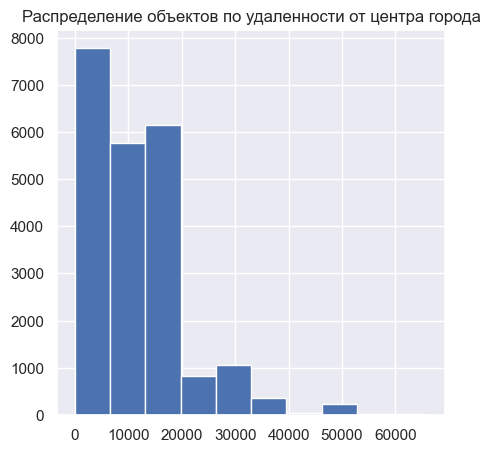

In [276]:
plt.title('Распределение объектов по удаленности от центра города')
data['city_centers_nearest'].hist(figsize=(5,5));

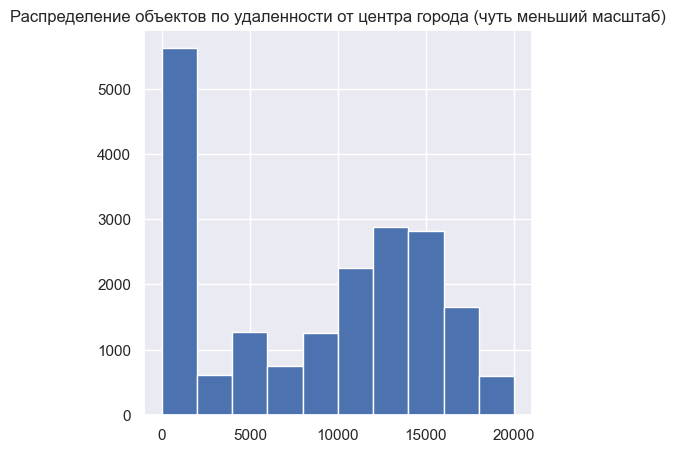

In [277]:
plt.title('Распределение объектов по удаленности от центра города (чуть меньший масштаб)')
data['city_centers_nearest'].hist(figsize=(5,5),range=(0,20000));

Аналогично аэропортам, либо дом стоит в центре города (поселка, села), либо - пик - в 12 км от центра города.

Есть дома и дальше, и ближе, но самые частые значения - в пределах 20 км

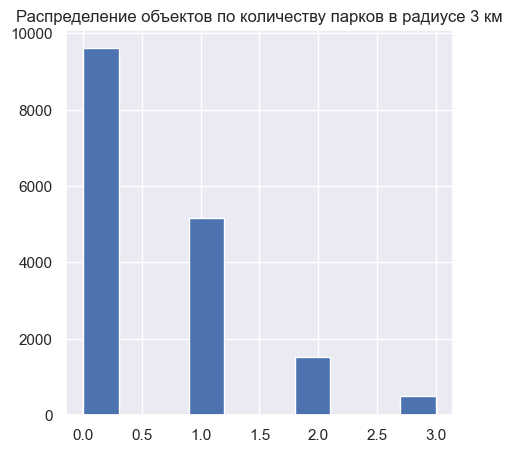

In [278]:
plt.title('Распределение объектов по количеству парков в радиусе 3 км')
data['parks_around_3000'].hist(figsize=(5,5));

Чаще всего парков вокруг нет - мне кажется, либо это деревня/поселок, где нет облагороженных парков, а лишь лес вокруг, либо просто жилой район без зеленой зоны.

Значения типа NaN тут не учитываются

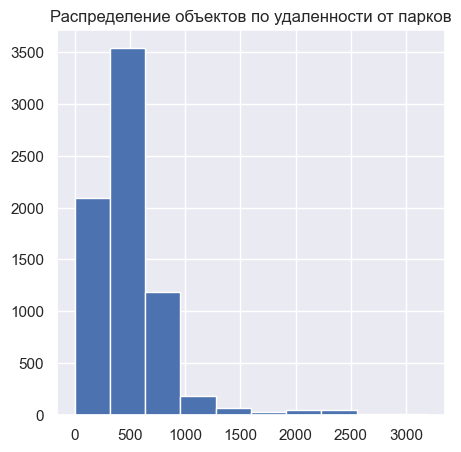

In [279]:
plt.title('Распределение объектов по удаленности от парков')
data['parks_nearest'].hist(figsize=(5,5));

Судя по этому графику, чаще всего встречаются объекты, где парки в зоне пешей доступности, гораздо реже - где до парка > 900 м

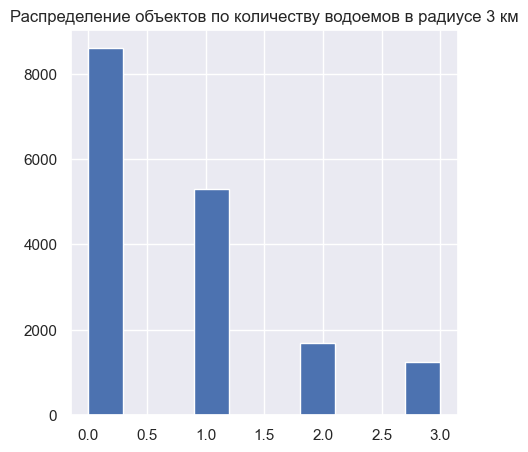

In [280]:
plt.title('Распределение объектов по количеству водоемов в радиусе 3 км')
data['ponds_around_3000'].hist(figsize=(5,5));

Как и в случае с парками - чаще всего водоемов поблизости нет.

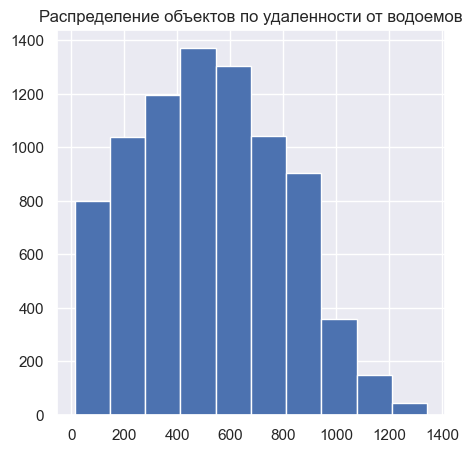

In [281]:
plt.title('Распределение объектов по удаленности от водоемов')
data['ponds_nearest'].hist(figsize=(5,5));

Среди тех объектов, рядом с которыми есть водоёмы - бОльшее количество находятся в пределах 900 м

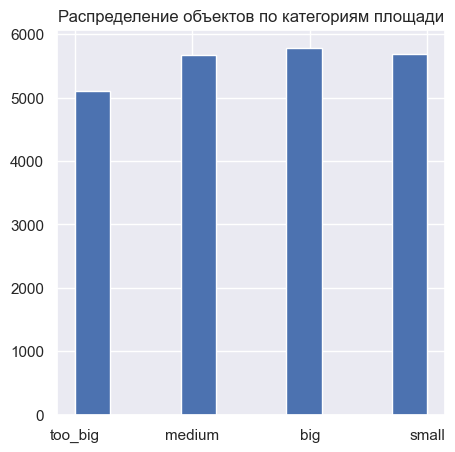

In [282]:
plt.title('Распределение объектов по категориям площади')
data['area_category'].hist(figsize=(5,5));

Разбивка объектов по типу площади примерно одинакова - то есть у нас примерно одинаковое количество квартир с разной площадью

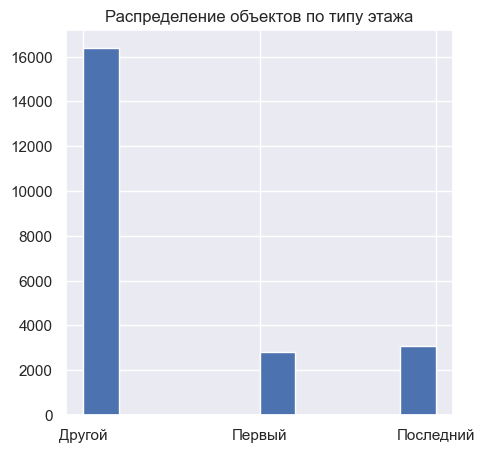

In [283]:
plt.title('Распределение объектов по типу этажа')
data['floor_type'].hist(figsize=(5,5));

Чаще всего встречаются объекты на "другом" этаже - первый и последний занимают где то 12-13% от всего количества - а все остальные - "те что между"

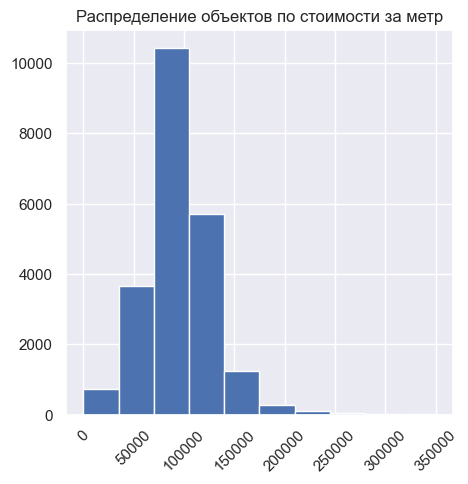

In [284]:
plt.title('Распределение объектов по стоимости за метр')
data['one_metr'].hist(figsize=(5,5), range=(0,350000),xrot=45);

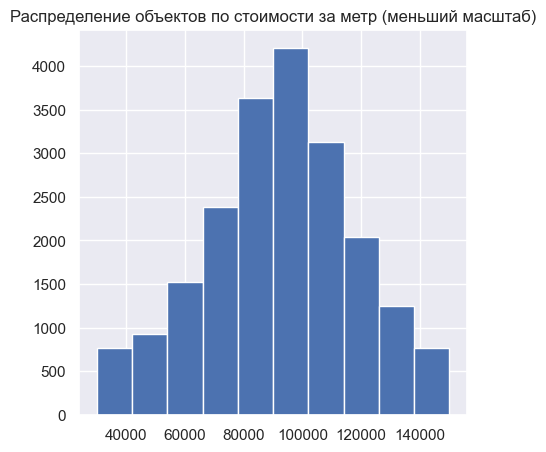

In [285]:
plt.title('Распределение объектов по стоимости за метр (меньший масштаб)')
data['one_metr'].hist(figsize=(5,5),range=(30000,150000));

Пик приходится на показатели 90.000-100.000 рублей за метр, но дороже 170.000 за метро квартиры встречаются редко, дороже 210.000 - еще реже

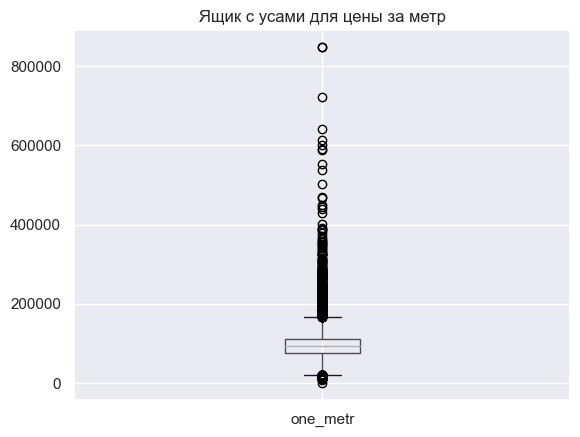

In [286]:
plt.title('Ящик с усами для цены за метр')
data.boxplot(column='one_metr');

Верхний ус заканчивается как раз на 170.000

In [287]:
data['days_exposition'].describe()

count    19419.000000
mean       174.595036
std        212.686207
min          1.000000
25%         44.000000
50%         92.000000
75%        222.000000
max       1580.000000
Name: days_exposition, dtype: float64

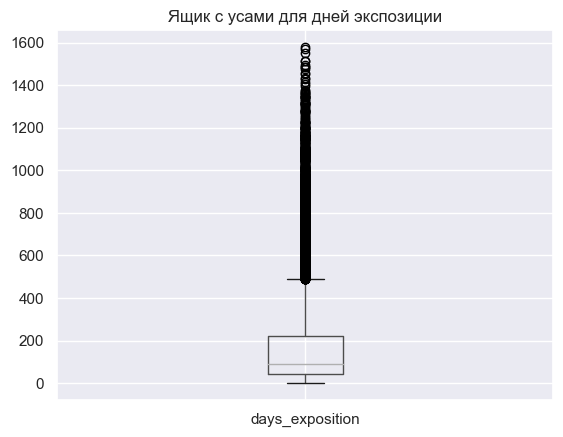

In [288]:
plt.title('Ящик с усами для дней экспозиции')
data.boxplot(column='days_exposition');

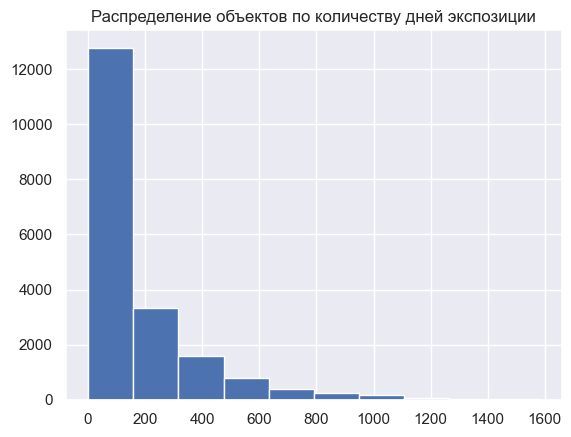

In [289]:
plt.title('Распределение объектов по количеству дней экспозиции')
data['days_exposition'].hist();

In [172]:
data[data['days_exposition']>489] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category,one_metr,km_from_city_center,floor_type,year,month,day
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,big,92786.0,14.0,Другой,2015,8,3
17,6,4180000.0,36.00,2016-09-09,1,NaN,17,16.50,7,False,False,False,11.0,1,санкт-петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0,small,116111.0,15.0,Другой,2016,9,4
23,11,2950000.0,32.00,2016-10-29,1,2.60,9,17.70,9,False,False,False,6.1,0,санкт-петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0,small,92188.0,14.0,Последний,2016,10,5
43,13,9330000.0,48.00,2017-01-10,2,3.00,4,28.00,4,False,False,False,7.5,0,санкт-петербург,15016.0,10822.0,0.0,NaN,1.0,492.0,763.0,medium,194375.0,11.0,Последний,2017,1,1
61,18,7990000.0,74.00,2017-08-24,2,NaN,4,43.00,4,False,False,False,20.0,0,санкт-петербург,22568.0,4288.0,1.0,363.0,0.0,NaN,609.0,too_big,107973.0,4.0,Последний,2017,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,9000000.0,110.00,2015-12-10,4,3.36,7,64.60,5,False,False,False,15.8,0,санкт-петербург,26313.0,5016.0,3.0,417.0,1.0,118.0,816.0,too_big,81818.0,5.0,Другой,2015,12,3
23672,5,3000000.0,30.80,2016-06-08,1,NaN,5,16.10,3,False,False,False,6.3,0,санкт-петербург,44614.0,14193.0,2.0,258.0,0.0,NaN,808.0,small,97403.0,14.0,Другой,2016,6,2
23675,8,3550000.0,39.50,2016-10-03,1,NaN,16,19.00,13,False,False,False,8.5,0,санкт-петербург,25740.0,14951.0,0.0,NaN,0.0,NaN,721.0,small,89873.0,15.0,Другой,2016,10,0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.30,7,False,False,False,10.6,1,санкт-петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,too_big,129904.0,4.0,Другой,2016,10,3


В данном случае мы видим, что среднее время продажи - 92 дня, "нормальной" считается продажа в пределах от 44 дней до 222, 489 дней - порог нормально-долгого значения и аномально долгого, все что больше - считается уже "необычно долгой" продажей (а таких объектов у нас целых 1598 штук - 7% от числа всех объектов). Все что меньше 44 - соответственно - очень быстрой.

In [173]:
pd.qcut(data['one_metr'], 5)

0        (117778.0, 848485.0]
1          (70312.0, 87500.0]
2         (87500.0, 100121.8]
4         (87500.0, 100121.8]
5         (87500.0, 100121.8]
                 ...         
23693      (70312.0, 87500.0]
23695      (111.999, 70312.0]
23696      (111.999, 70312.0]
23697    (117778.0, 848485.0]
23698      (111.999, 70312.0]
Name: one_metr, Length: 22259, dtype: category
Categories (5, interval[float64, right]): [(111.999, 70312.0] < (70312.0, 87500.0] < (87500.0, 100121.8] < (100121.8, 117778.0] < (117778.0, 848485.0]]

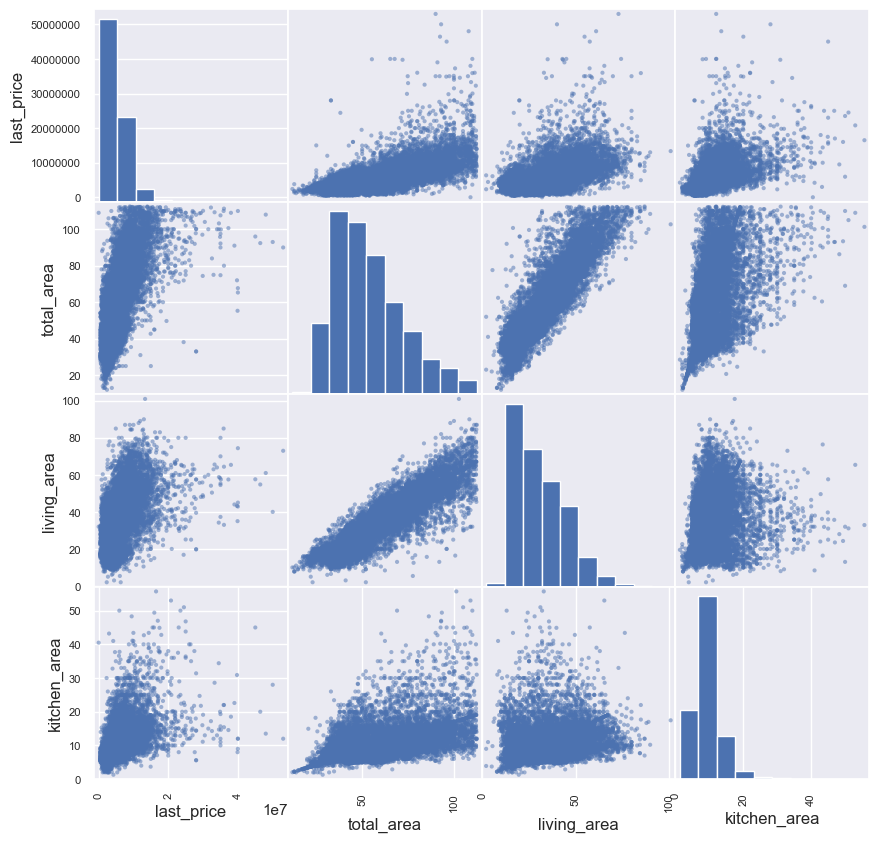

In [290]:
df_an = data[['last_price','total_area','living_area','kitchen_area']]
pd.plotting.scatter_matrix(df_an, figsize=(10, 10));

Да этой матрице рассеивания показано (самая первая строчка) как общая площадь, площадь жилая и кухни (последние три графика первой строчки) влияют на рост цены:

1. Общая площадь:

    Видно, что с увеличением общей площади объекта пропорционально растет цена объекта. Есть конечно и некоторые объекты, который в сравнении с объектами с такой же площадью имеют цену х2, но основная масса находится примерно в одном диапазоне.
    
    
2. Жилая площадь:

    С жилой площадью примерно та же история, что и с общей площадью, потому что она зависит от общей площади => значения жилой площади и стоимости квартиры примерно такая же, как и зависимость между общей площадью и ценой объекта, разница лишь в том, что разброс жилой площади меньше - следовательно и разброс цен меньше.
    
    
3. Площадь кухни:

    Немного другая история относительно плоащади кухни - при средних значениях наблюдается небольшой пик прироста цены.

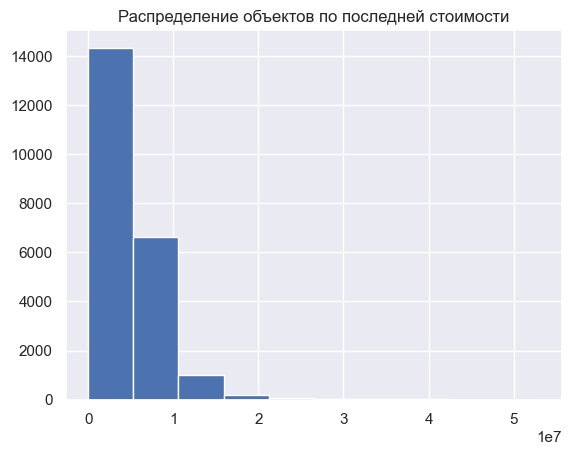

In [292]:
plt.title('Распределение объектов по последней стоимости')
data['last_price'].hist();

In [293]:
pd.qcut(data['last_price'],3)

0        (5500000.0, 53000000.0]
1         (12189.999, 3700000.0]
2         (3700000.0, 5500000.0]
4        (5500000.0, 53000000.0]
5         (12189.999, 3700000.0]
                  ...           
23693     (3700000.0, 5500000.0]
23695     (12189.999, 3700000.0]
23696     (12189.999, 3700000.0]
23697    (5500000.0, 53000000.0]
23698     (12189.999, 3700000.0]
Name: last_price, Length: 22259, dtype: category
Categories (3, interval[float64, right]): [(12189.999, 3700000.0] < (3700000.0, 5500000.0] < (5500000.0, 53000000.0]]

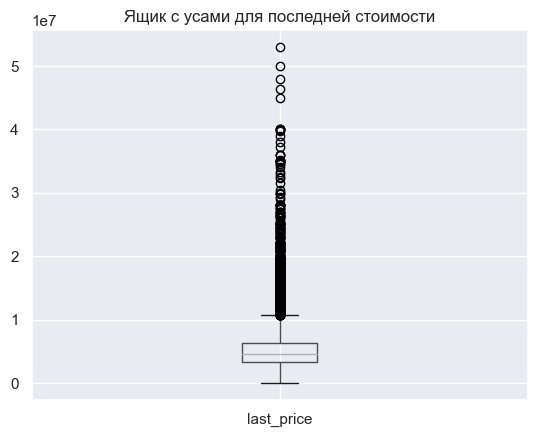

In [294]:
plt.title('Ящик с усами для последней стоимости')
data.boxplot(column='last_price');

In [295]:
data['last_price'].describe()

count    2.225900e+04
mean     5.272433e+06
std      3.311203e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.280000e+06
max      5.300000e+07
Name: last_price, dtype: float64

10.675 - потолок верхнего уса, следовательно 10.675.000 - максимальная "нормальная" стоимость квартиры. Все что выше - считается "слишком дорогим" значением цены, имеет смысл посмотреть различия между нормальными, дешевыми и дорогими квартирами:

In [296]:
def flat_type(t):
    if t < 3350000:
        return 'low price'
    elif 3350000 < t < 6280000:
        return 'medium'
    else:
        return 'high'

In [297]:
data['type'] = data['last_price'].apply(flat_type)

Я поменяла еще в нескольких столбцах типы данных, и для сохранения изначальной таблицы, далее буду работать с её копией:

In [298]:
newdata = data.convert_dtypes().copy()
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22259 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22259 non-null  Int64         
 1   last_price            22259 non-null  Int64         
 2   total_area            22259 non-null  Float64       
 3   first_day_exposition  22259 non-null  datetime64[ns]
 4   rooms                 22259 non-null  Int64         
 5   ceiling_height        13587 non-null  Float64       
 6   floors_total          22259 non-null  Int32         
 7   living_area           22259 non-null  Float64       
 8   floor                 22259 non-null  Int64         
 9   is_apartment          22259 non-null  boolean       
 10  is_studio             22259 non-null  boolean       
 11  open_plan             22259 non-null  boolean       
 12  kitchen_area          22259 non-null  Float64       
 13  balcony         

In [182]:
df8 = newdata.groupby('type').agg('median').copy()
df8['count'] = newdata.groupby('type')[['last_price']].count()
df8 = df8.sort_values('total_area')
df8

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_metr,km_from_city_center,year,month,day,count
type,,,,,,,,,,,,,,,,,,,,,,,,,,
low price,8.0,2600000.0,37.4,1.0,2.55,5.0,19.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,422.0,0.0,521.5,88.0,64978.0,0.0,2017.0,6.0,3.0,5478
medium,9.5,4500000.0,47.35,2.0,2.6,9.0,28.4,5.0,0.0,0.0,0.0,8.7,0.0,25221.0,13094.0,0.0,459.0,0.0,538.0,86.0,94386.0,13.0,2017.0,6.0,3.0,11108
high,11.0,8150000.0,74.0,3.0,2.8,10.0,42.75,5.0,0.0,0.0,0.0,12.0,0.0,26041.0,10458.0,1.0,459.0,1.0,486.0,111.0,117284.0,10.0,2017.0,6.0,3.0,5673


В данной таблице видно, что цена растет сопоставимо общей площади, количеству комнат, расположению аэропорта и центра города поблизости. На стоимость слабо влияют наличие/отсутствие парков и водоёмов рядом, этаж здания и высота потолков.

In [195]:
df8_2['last_price']

total_area
12.0      2400000.0
13.0      1850000.0
13.2      1686000.0
14.0      1190000.0
15.0      1725000.0
            ...    
112.1    11983878.0
112.2    11475975.0
112.3    13975000.0
112.4    13990000.0
112.5     8950000.0
Name: last_price, Length: 1612, dtype: float64

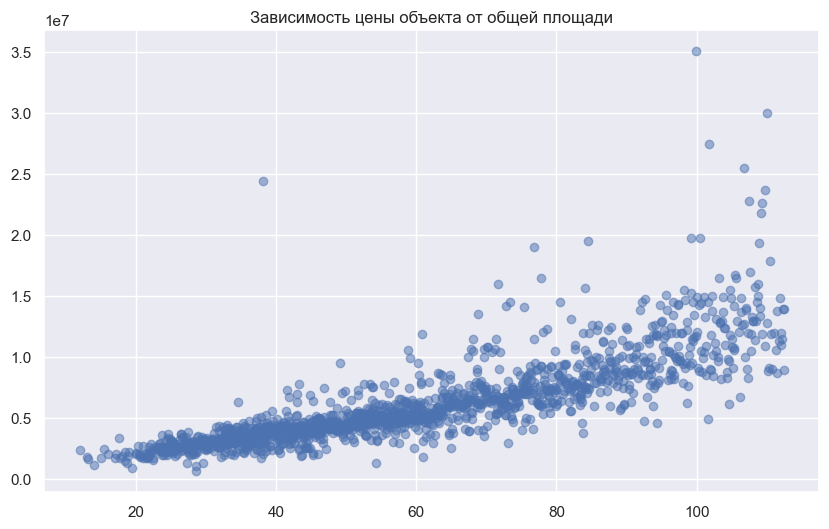

In [301]:
df8_2 = data.pivot_table(index='total_area', values='last_price',aggfunc='median')
plt.figure(figsize=(10,6))
plt.title('Зависимость цены объекта от общей площади')
plt.scatter(x=df8_2.index, y=df8_2['last_price'], alpha=0.5)
plt.show()

По графику видно, что стоимость жилья увеличивается с ростом общей площади (конечно, имеют место быть и выбросы по значениям). Построим и для остальных площадей:

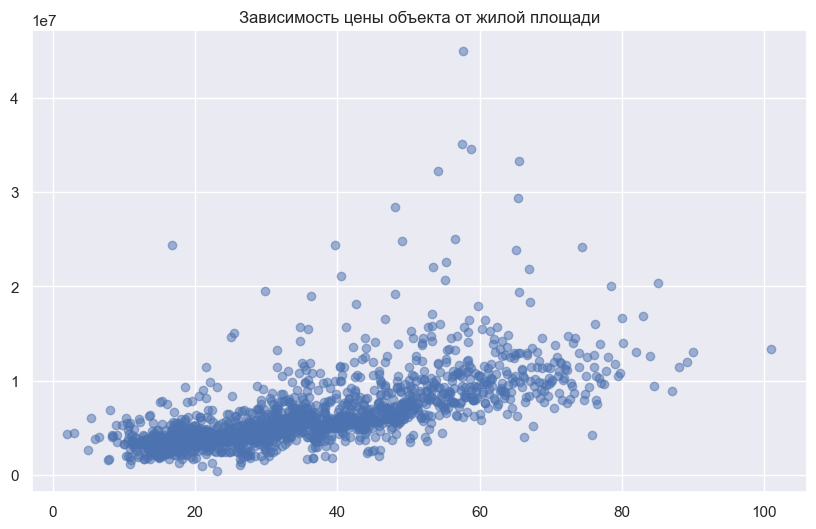

In [300]:
df8_3 = data.pivot_table(index='living_area', values='last_price',aggfunc='median')
plt.figure(figsize=(10,6))
plt.title('Зависимость цены объекта от жилой площади')
plt.scatter(x=df8_3.index, y=df8_3['last_price'], alpha=0.5)
plt.show()

Здесь основная масса наблюдений сосредоточена в промежутке между 10 и (где-то) 40 кв. метрами жилой площади - также наблюдаются выбросы, они чуть сильнее раскинуты по графику и всем возможным значениям.

Сложно сказать, есть ли прямая зависимость между этими двумя величинами, но скученность графика скорее говорит о ее наличии, чем об отсутствии.

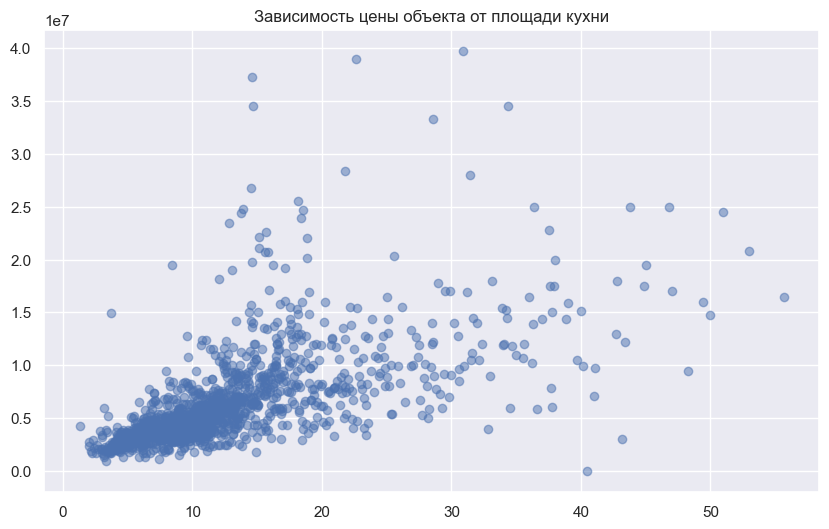

In [302]:
df8_4 = data.pivot_table(index='kitchen_area', values='last_price',aggfunc='median')
plt.figure(figsize=(10,6))
plt.title('Зависимость цены объекта от площади кухни')
plt.scatter(x=df8_4.index, y=df8_4['last_price'], alpha=0.5)
plt.show()

С этим графиком также все неоднозначно - чем больше площадь кухни, тем более разбросанная стоимость объекта оказывается - говорить о четкой корреляции сложно.

In [207]:
newdata[['last_price','total_area','rooms','living_area','kitchen_area','airports_nearest','city_centers_nearest']].corr()

,last_price,total_area,rooms,living_area,kitchen_area,airports_nearest,city_centers_nearest
last_price,1.000000,0.681588,0.382779,0.552568,0.538296,0.225111,0.026589
total_area,0.681588,1.000000,0.788510,0.909346,0.518340,0.047214,-0.031615
rooms,0.382779,0.788510,1.000000,0.872645,0.136162,-0.021439,-0.017841
living_area,0.552568,0.909346,0.872645,1.000000,0.234937,0.006776,-0.033737
kitchen_area,0.538296,0.518340,0.136162,0.234937,1.000000,0.092842,-0.037261
airports_nearest,0.225111,0.047214,-0.021439,0.006776,0.092842,1.000000,0.514786
city_centers_nearest,0.026589,-0.031615,-0.017841,-0.033737,-0.037261,0.514786,1.000000


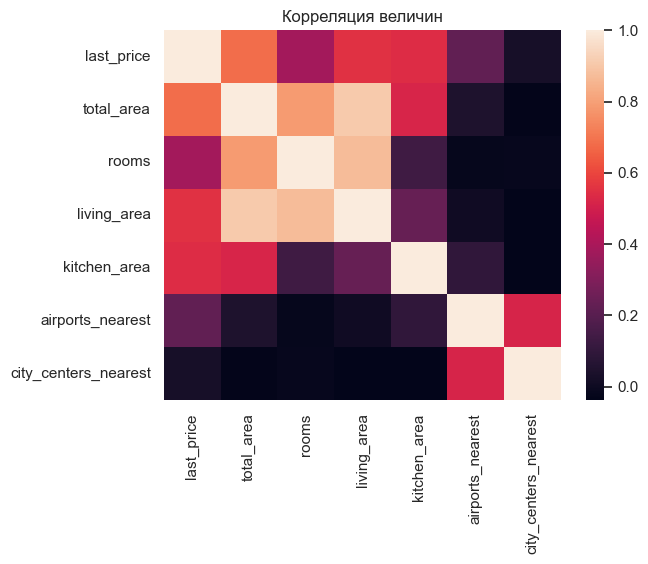

In [303]:
plt.title('Корреляция величин')
sns.heatmap(newdata[['last_price','total_area','rooms','living_area','kitchen_area','airports_nearest','city_centers_nearest']].corr());

Матрица корреляции и хитмэп (для наглядности) подтвердили зависимость между общей стоимостью и общей площадью (а также жилой площадью и площадью кухни). Однако так как количество  комнат достаточно тесно связано с жилой площадью - тогда возможно, что здесь взаимосвязь более сложная, и имеет место быть другой фактор, влияющий на итоговую стоимость объекта.

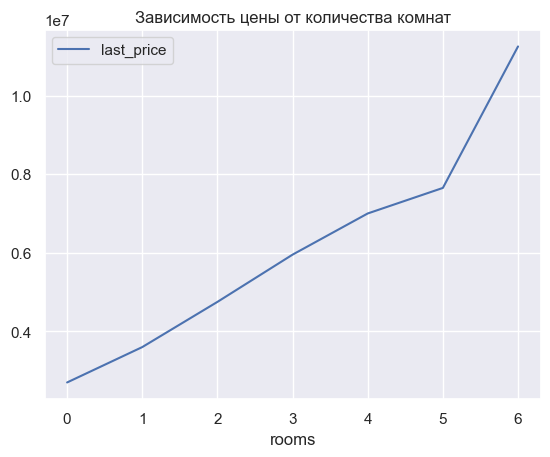

In [305]:
df_6 = newdata.pivot_table(index='rooms', values='last_price',aggfunc='median')
df_6.plot(title='Зависимость цены от количества комнат');

На графике видно, что чем больше количество комнат, тем больше цена. Однако количество комнат достаточно тесно связано с общей площадью квартиры.

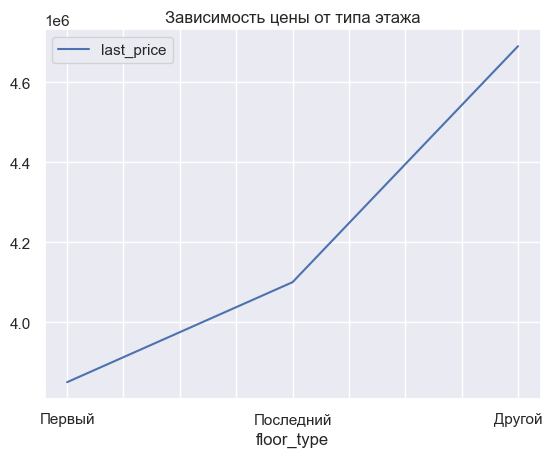

In [308]:
df_9 = newdata.pivot_table(index='floor_type', values='last_price', aggfunc='median').sort_values('last_price')
df_9.plot(title='Зависимость цены от типа этажа');

Как видим, люди более интересуются "средними" этажами, квартиры на первом этаже имеют наименьшую среднюю стоимость

In [212]:
newdata[['last_price','day','month','year']].corr()

,last_price,day,month,year
last_price,1.000000,-0.014996,-0.003387,-0.006737
day,-0.014996,1.000000,0.012896,-0.003139
month,-0.003387,0.012896,1.000000,-0.271004
year,-0.006737,-0.003139,-0.271004,1.000000


In [213]:
newdata.groupby(['type','year'])[['last_price']].median()

last_price
type      year            
high      2014  10487000.0
          2015   8290000.0
          2016   8100000.0
          2017   8200000.0
          2018   8040000.0
          2019   8150000.0
low price 2014   2649500.0
          2015   2700000.0
          2016   2700000.0
          2017   2690000.0
          2018   2570000.0
          2019   2500000.0
medium    2014   4600000.0
          2015   4650000.0
          2016   4399153.5
          2017   4437500.0
          2018   4500000.0
          2019   4690000.0

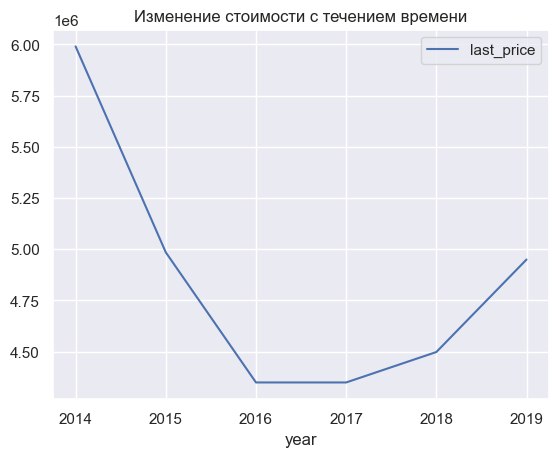

In [310]:
df8_3 = newdata.pivot_table(index=['year'], values='last_price', aggfunc='median')
df8_3.plot(title='Изменение стоимости с течением времени');

В целом, как уже и оговаривалось выше, квартиры имели до 2016 года включительно к понижению средней стоимости, а с 2017 года - к увеличению

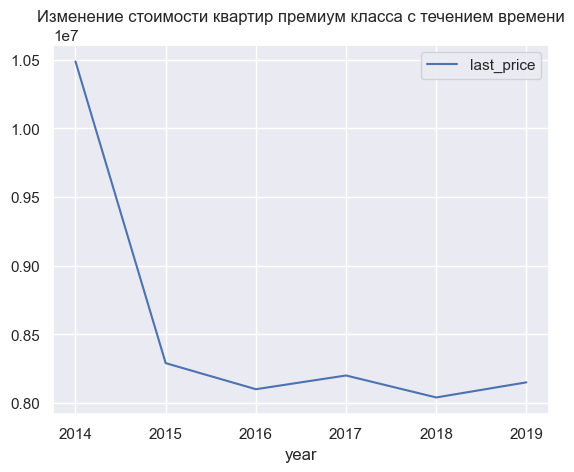

In [312]:
df8_3 = newdata[newdata['type']=='high'].pivot_table(index='year', values='last_price', aggfunc='median');
df8_3.plot(title='Изменение стоимости квартир премиум класса с течением времени');

Дорогие квартиры резко снизились в цене за 1 год и дальше держались относительно стабильно. С 2014 по 2018 год их стоимость упала практически на 24%.

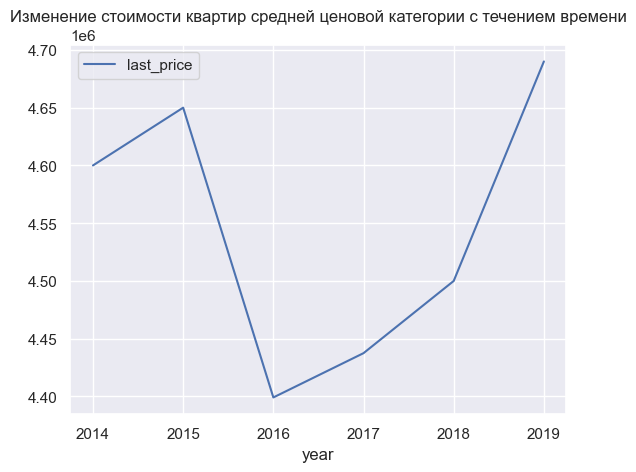

In [313]:
df8_3 = newdata[newdata['type']=='medium'].pivot_table(index='year', values='last_price', aggfunc='median');
df8_3.plot(title='Изменение стоимости квартир средней ценовой категории с течением времени');

У квартир средней ценовой категории наблюдается резкий надир в 2016 году, и повышение к 2019 году, но относильно показателей цены - значения колебались несильно - в пределах 5%.

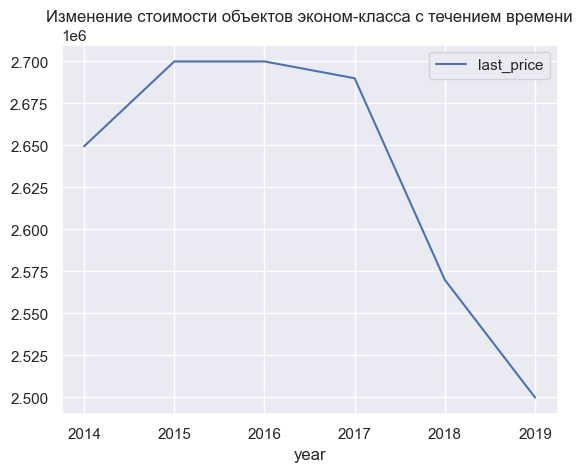

In [315]:
df8_3 = newdata[newdata['type']=='low price'].pivot_table(index='year', values='last_price', aggfunc='median');
df8_3.plot(title='Изменение стоимости объектов эконом-класса с течением времени');

Для квартир низкого бюджета наблюдается скачок в 2015 году - прирост цены на +-2%, а затем в 2018 году резкий спад практически на 5%.

In [218]:
newdata.groupby(['type','month'])[['last_price']].count()

last_price
type      month            
high      1             369
          2             642
          3             600
          4             614
          5             281
          6             413
          7             389
          8             419
          9             485
          10            494
          11            560
          12            407
low price 1             354
          2             638
          3             609
          4             501
          5             293
          6             451
          7             381
          8             417
          9             446
          10            474
          11            518
          12            396
medium    1             678
          2            1208
          3            1240
          4            1125
          5             608
          6             796
          7             808
          8             816
          9             920
          10           1039
          11           1137
          12            733

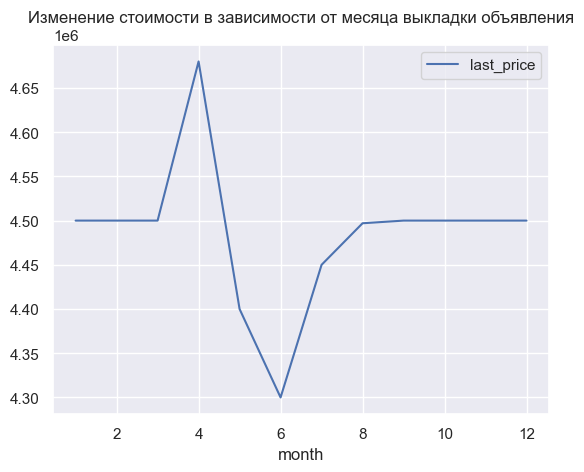

In [314]:
df8_4 = newdata.pivot_table(index='month', values='last_price', aggfunc='median');
df8_4.plot(title='Изменение стоимости в зависимости от месяца выкладки объявления');

В апреле цена дороже, в июне - дешевле. Возможно это связано с временем года (период отпусков).

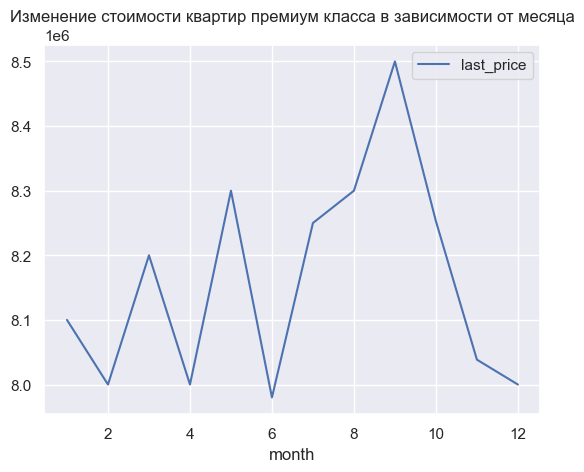

In [316]:
df8_4 = newdata[newdata['type']=='high'].pivot_table(index='month', values='last_price', aggfunc='median');
df8_4.plot(title='Изменение стоимости квартир премиум класса в зависимости от месяца');

Квартиры с высокой ценовой политикой - чаще всего публикуют объявления в Марте, Мае и Сентябре. Меньше всего - Февраль, Апрель, Июнь и Декабрь.

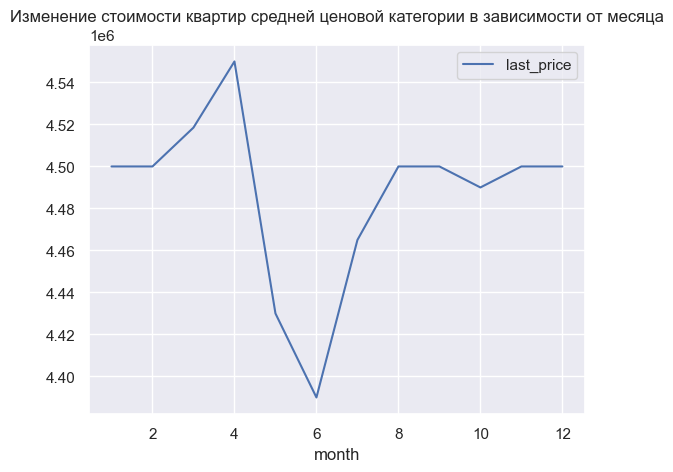

In [317]:
df8_4 = newdata[newdata['type']=='medium'].pivot_table(index='month', values='last_price', aggfunc='median');
df8_4.plot(title='Изменение стоимости квартир средней ценовой категории в зависимости от месяца');

Пик - Апрель, надир - Июнь.

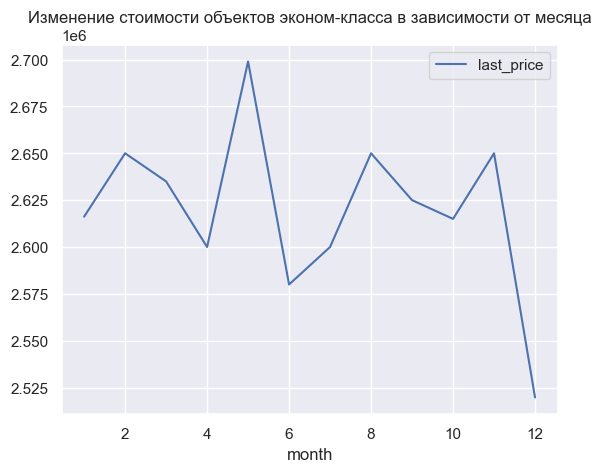

In [318]:
df8_4 = newdata[newdata['type']=='low price'].pivot_table(index='month', values='last_price', aggfunc='median');
df8_4.plot(title='Изменение стоимости объектов эконом-класса в зависимости от месяца');

Пики - Февраль, Май, Август и Ноябрь. Надиры - Апрель, Июнь и Декабрь.

In [223]:
newdata.groupby(['type','day'])[['last_price']].count()

last_price
type      day            
high      0           846
          1          1023
          2           963
          3          1047
          4           961
          5           455
          6           378
low price 0           809
          1           953
          2           918
          3           998
          4           917
          5           475
          6           408
medium    0          1751
          1          1965
          2          1823
          3          1955
          4          1900
          5           896
          6           818

Как и предполагала в начале, имеет тенденция к выкладыванию объявлений на буднях - в середине недели, а к выходным - наоборот - к уменьшению.

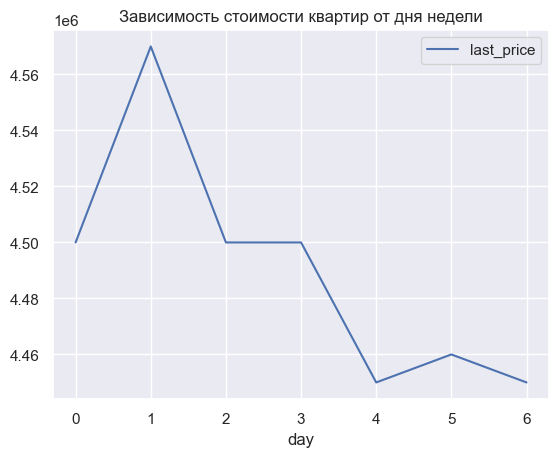

In [319]:
df8_5 = newdata.pivot_table(index='day', values='last_price', aggfunc='median')
df8_5.plot(title='Зависимость стоимости квартир от дня недели');

Пик среди всех приходится на вторник - возможно, в понедельник возвращаются в рабочий ритм после выходных.

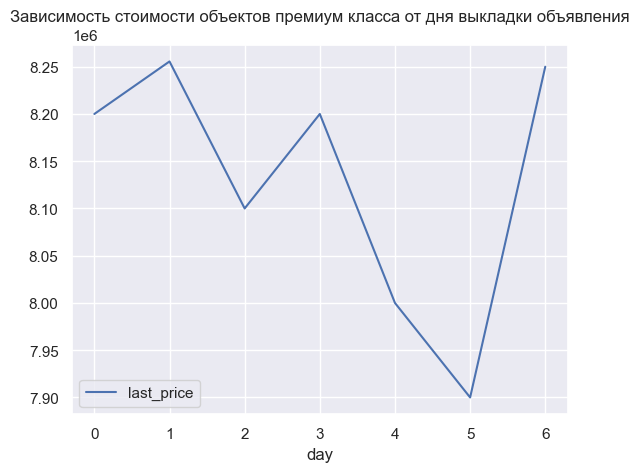

In [320]:
df8_4 = newdata[newdata['type']=='high'].pivot_table(index='day', values='last_price', aggfunc='median')
df8_4.plot(title='Зависимость стоимости объектов премиум класса от дня выкладки объявления');

Среди дорогих объектов реже всего выставляют новые объекты в пятницу и субботу.

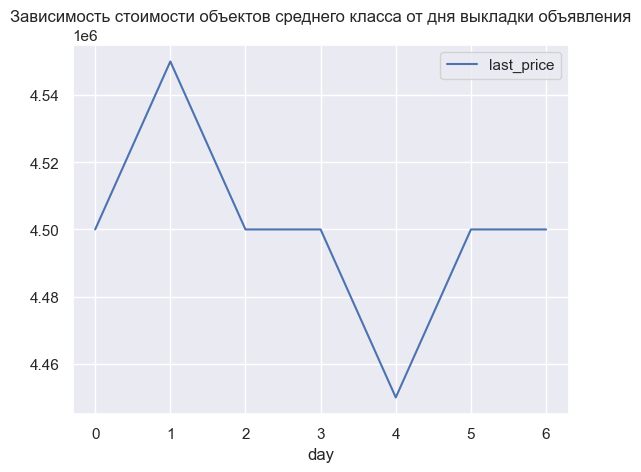

In [321]:
df8_4 = newdata[newdata['type']=='medium'].pivot_table(index='day', values='last_price', aggfunc='median');
df8_4.plot(title='Зависимость стоимости объектов среднего класса от дня выкладки объявления');

По средним заметно проседает пятница, а пик приходится на вторник

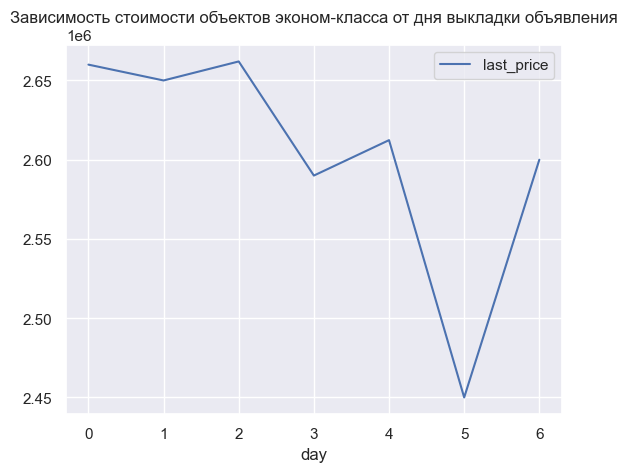

In [322]:
df8_4 = newdata[newdata['type']=='low price'].pivot_table(index='day', values='last_price', aggfunc='median');
df8_4.plot(title='Зависимость стоимости объектов эконом-класса от дня выкладки объявления');

У бюджетных вариантов самый сильный надир в субботу

In [323]:
df11 = data.groupby('locality_name')[['last_price','one_metr']].agg({'last_price':'count','one_metr':'median'}).copy()
df11 = df11.sort_values('last_price', ascending=False)
df11.head(10)

,last_price,one_metr
locality_name,,
санкт-петербург,14446,103906.0
поселок мурино,552,86059.5
поселок шушары,435,76667.0
всеволожск,395,65789.0
пушкин,346,99596.0
колпино,336,74723.5
поселок парголово,326,91780.5
гатчина,304,67861.0
деревня кудрово,298,91831.5


В таблице выше представлены средние цены по 10 городам с наибольшим количеством объявлений.

In [324]:
df11.sort_values('one_metr', ascending=False)

,last_price,one_metr
locality_name,,
санкт-петербург,14446,103906.0
зеленогорск,23,103333.0
сестрорецк,168,100493.0
кудрово,171,100000.0
пушкин,346,99596.0
...,...,...
поселок совхозный,2,12629.5
деревня выскатка,2,12335.5
деревня вахнова кара,1,11688.0


В данной таблице представлены "самые дорогие" и "самые бюджетные" районы. Неожиданно, что Санкт-Петербург занимает лишь 2е место, курортный город "Зеленогорск" его обогнал.

In [325]:
df_spb = newdata[newdata['locality_name'] == 'санкт-петербург']
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category,one_metr,km_from_city_center,floor_type,year,month,day,type
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482,2,755,<NA>,too_big,120370,16,Другой,2019,3,3,high
2,10,5196000,56.0,2015-08-20,2,<NA>,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90,2,574,558.0,big,92786,14,Другой,2015,8,3,medium
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112,1,48,121.0,too_big,100000,8,Другой,2018,6,1,high
7,5,7915000,71.6,2019-04-18,2,<NA>,24,42.96,22,False,False,False,18.9,2,санкт-петербург,23982.0,11634.0,0,<NA>,0,<NA>,<NA>,too_big,110545,12,Другой,2019,4,3,high
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,False,False,False,6.5,2,санкт-петербург,50898.0,15008.0,0,<NA>,0,<NA>,289.0,big,88525,15,Другой,2017,2,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.0,2019-04-01,3,3.05,15,63.0,12,False,False,False,15.0,0,санкт-петербург,15632.0,14428.0,0,<NA>,0,<NA>,23.0,too_big,91089,14,Другой,2019,4,0,high
23689,13,3550000,35.3,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.1,2,санкт-петербург,17284.0,16081.0,1,353,2,652,29.0,small,100567,16,Другой,2018,2,2,medium
23690,3,5500000,52.0,2018-07-19,2,<NA>,5,31.0,2,False,False,False,6.0,0,санкт-петербург,20151.0,6263.0,1,300,0,<NA>,15.0,too_big,105769,6,Другой,2018,7,3,medium
23691,11,9470000,72.9,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.6,1,санкт-петербург,19424.0,4489.0,0,<NA>,1,806,519.0,too_big,129904,4,Другой,2016,10,3,high


In [326]:
df_spb['m_km'] = df_spb['last_price']/df_spb['km_from_city_center']
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_category,one_metr,km_from_city_center,floor_type,year,month,day,type,m_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482,2,755,<NA>,too_big,120370,16,Другой,2019,3,3,high,812500.0
2,10,5196000,56.0,2015-08-20,2,<NA>,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90,2,574,558.0,big,92786,14,Другой,2015,8,3,medium,371142.857143
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112,1,48,121.0,too_big,100000,8,Другой,2018,6,1,high,1250000.0
7,5,7915000,71.6,2019-04-18,2,<NA>,24,42.96,22,False,False,False,18.9,2,санкт-петербург,23982.0,11634.0,0,<NA>,0,<NA>,<NA>,too_big,110545,12,Другой,2019,4,3,high,659583.333333
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,False,False,False,6.5,2,санкт-петербург,50898.0,15008.0,0,<NA>,0,<NA>,289.0,big,88525,15,Другой,2017,2,6,medium,360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.0,2019-04-01,3,3.05,15,63.0,12,False,False,False,15.0,0,санкт-петербург,15632.0,14428.0,0,<NA>,0,<NA>,23.0,too_big,91089,14,Другой,2019,4,0,high,657142.857143
23689,13,3550000,35.3,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.1,2,санкт-петербург,17284.0,16081.0,1,353,2,652,29.0,small,100567,16,Другой,2018,2,2,medium,221875.0
23690,3,5500000,52.0,2018-07-19,2,<NA>,5,31.0,2,False,False,False,6.0,0,санкт-петербург,20151.0,6263.0,1,300,0,<NA>,15.0,too_big,105769,6,Другой,2018,7,3,medium,916666.666667
23691,11,9470000,72.9,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.6,1,санкт-петербург,19424.0,4489.0,0,<NA>,1,806,519.0,too_big,129904,4,Другой,2016,10,3,high,2367500.0


Немного не понимаю, что значит "средняя цена каждого километра"

In [327]:
df_spb[['last_price','km_from_city_center']].corr()

,last_price,km_from_city_center
last_price,1.000000,-0.379717
km_from_city_center,-0.379717,1.000000


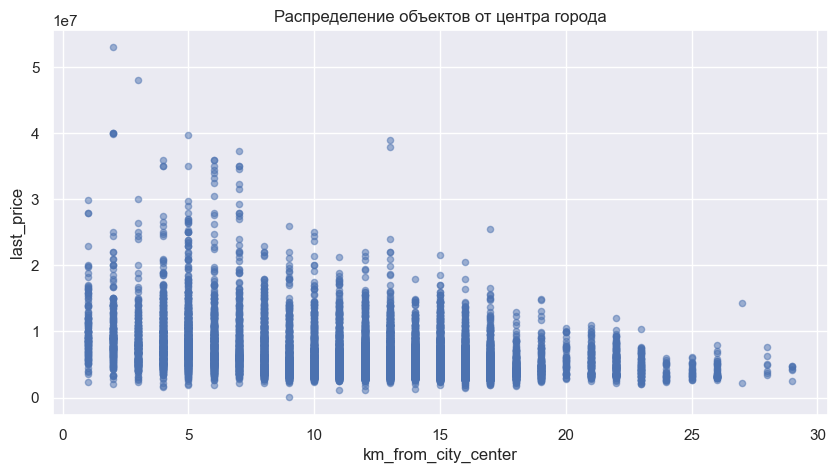

In [328]:
df_spb[df_spb['km_from_city_center']!=0.0].plot(x='km_from_city_center', y='last_price', 
                                                kind='scatter', alpha=0.5, figsize=(10,5),
                                               title='Распределение объектов от центра города');

По матрице корреляции видно и графику, что зависимость между километражем до центра и стоимость обратная, однако нельзя говорить о сильной взаимосвязи, тк коеффициент корреляции = -0.37.

In [329]:
spb_km = df_spb.pivot_table(index='km_from_city_center', values='m_km',aggfunc='median')
spb_km

,m_km
km_from_city_center,
0,inf
1,9200000.0
2,4430000.0
3,2521000.0
4,1987500.0
5,1600000.0
6,1266666.666667
7,971428.571429
8,834375.0


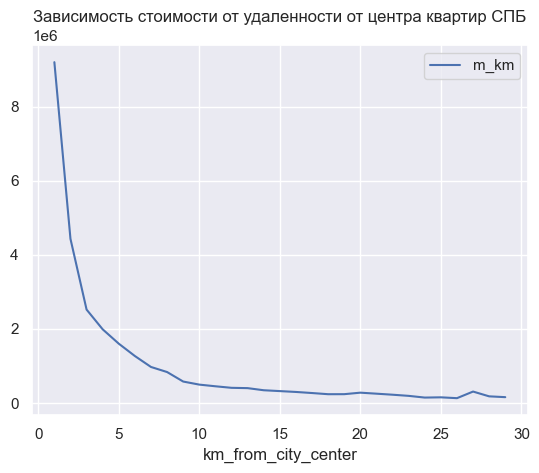

In [330]:
spb_km.plot(grid = True, title = 'Зависимость стоимости от удаленности от центра квартир СПБ');

На графике показана зависимость стоимости от удаленности от центра квартир Питера. Соответственно, чем дальше, тем меньше стоит объект

### Общий вывод

В начале работы мы ставили целью определить ценообразующие факторы разных объектов Санкт-Петербурга и Ленинградской области. 

Проведя анализ исходных данных, подготовив их для исследования, заполнив пропуски и убрав выбивающиеся значения, мы изучили вопрос с разных сторон и сделали вывод, что самое большое влияние на стоимость оказали общая площадь объекта, а также год публикации (в разные года были разные тенденции).

Также прослеживается прямая зависимость между стоимостью и удаленностью от центра города (чем дальше - тем дешевле), наличием/отсутствием аэропорта (наличие аэропорта в городе - больше +, чем -), количеством комнат (количество комнат в целом растет пропорционально общей площади помещения), а также площадью жилой и кухни (аналогично с количеством комнат).

Зависимость между ценой объекта и расстоянием до центра города можно объяснить следующим образом:

Базовая стоимость объекта складывается из понятий общей площади, количества комнат, расположения (какой это город и есть ли аэропорт), при том, чем меньше расстояние от центра города, тем выше стоимость.